# import

In [3]:
from __future__ import absolute_import, print_function, division

from matplotlib import dates as mpl_dates
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
import matplotlib
from matplotlib import pyplot
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib import rcParams
from matplotlib.patches import Circle, Rectangle, Ellipse, Polygon, FancyArrow
from matplotlib.collections import PatchCollection, LineCollection


import datetime
from collections import OrderedDict


from astropy.io.fits import getheader
from astropy.io.fits import getdata
from astropy.utils.data import get_pkg_data_filename
import aplpy
from astropy import log
from astropy.io import fits
import astropy.coordinates as coord
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.table import Table
from astropy.wcs import WCS
from astropy import constants as const
from astropy.constants import k_B



import time
import math
import os,sys
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = "svg"
from matplotlib import rcParams
#rcParams["savefig.dpi"] = 300 #%matplotlib inline

In [42]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

# def

In [4]:
import os,sys,re
import time
#from datetime import datetime
import numpy as np
from astropy.io import fits

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def get_flag_tiles(metafits_file):
    flag_tiles=[]
    metafits=fits.open(metafits_file)
    for i,j in zip(metafits[1].data['Antenna'],metafits[1].data['Flag']):
        if j==1:
        #print(i,j)
            if i not in flag_tiles:
                flag_tiles.append(i)
    return flag_tiles

# color_band

In [35]:
from pylab import cm

bands_all=[87, 118, 154, 184, 215]
bands_all=sorted(bands_all)
colors_cm_10 = cm.get_cmap('tab10', 10)
corlors_band=[colors_cm_10(0),colors_cm_10(2),colors_cm_10(3),colors_cm_10(4),colors_cm_10(9)]
color_dict_band= dict(zip(bands_all, corlors_band))

# def_path

In [254]:
path_ipynb='/share/home/blv/mwa_code_py/ipynb'
path_img='/share/home/blv/MWAdata/qguo_data/img'
path_casaimg='/share/home/blv/MWAdata/qguo_data/casa_img/'

path_lc='/share/home/blv/MWAdata/qguo_data/lightcurve/'
path_lc_ratio='/share/home/blv/MWAdata/qguo_data/lightcurve/lc_ratio'
path_calibrate_lightcurve='/share/home/blv/MWAdata/qguo_data/lightcurve/calibrate_lightcurve'

path_aocal='/share/home/blv/MWAdata/qguo_data/aocal_plot_bin/'
path_spec='/share/home/blv/MWAdata/qguo_data/spec/'
path_skymodel='/share/home/blv/MWAdata/qguo_data/skymodels'
path_zip='/share/home/blv/MWAdata/qguo_data/zip/'

path_157='/share/home/blv/MWAdata/qguo_data/zip/157/'
obsids_path_157=get_obsids(path_157)
#obsid=obsids_157[0]



In [258]:
len(obsids_path_157)

6

In [260]:
path_src1000_large3='/share/home/blv/MWAdata/qguo_data/zip/157/src1000_large3/'
obsids_path_src1000_large3=get_obsids(path_src1000_large3)
print(len(obsids_path_src1000_large3))
path_src1000_large6='/share/home/blv/MWAdata/qguo_data/zip/157/src1000_large6/'
obsids_path_src1000_large6=get_obsids(path_src1000_large6)
print(len(obsids_path_src1000_large6))

12
6


In [7]:
path_nan_157='/share/home/blv/MWAdata/qguo_data/zip/157/nan_157/'
obsids_path_nan_157=get_obsids(path_nan_157)

In [143]:
path_157_zip1='/share/home/blv/MWAdata/qguo_data/zip/157/157_zip1/'
obsids_157_zip1=get_obsids(path_157_zip1)

In [259]:
len(obsids_157_zip1)

93

In [252]:
for i in obsids_157_zip1:
    file_path=os.path.join(path_157_zip1,i,'1207652304_srclist_cal_1000.bin')
    if not os.path.exists(file_path):
        print('not exists',i)
    else:
        file_size = os.path.getsize(file_path)
        if file_size>0:
            print('File size in Megabytes: ' + str(file_size/1024**2))
        else:
            print('0 bite',i)

File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size in Megabytes: 6.0000457763671875
File size i

# skymodel

## skymodeldata_100

In [16]:
npoint_cal=100
obsid=1207652304
skymodel_fitsfile_100='/share/home/blv/MWAdata/qguo_data/skymodels/1207652304_srclist_cal_100.fits'
skymodelhdul_100 = fits.open(skymodel_fitsfile_100)
skymodelhdul_100.info()
skymodeldata_100=skymodelhdul_100[1].data



skymodeldata_100_4Jy=skymodeldata_100[skymodeldata_100['peak_flux']>4]
print('skymodeldata_100_4Jy',len(skymodeldata_100_4Jy))


skymodeldata_100_10Jy=skymodeldata_100[skymodeldata_100['peak_flux']>10]
print('skymodeldata_100_10Jy',len(skymodeldata_100_10Jy))

Filename: /share/home/blv/MWAdata/qguo_data/skymodels/1207652304_srclist_cal_100.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     30   100R x 11C   [14A, D, D, 10A, 9A, D, D, D, D, D, D]   
skymodeldata_100_4Jy 54
skymodeldata_100_10Jy 19


## skymodeldata_1000

In [18]:
npoint_cal=1000
obsid=1207652304

skymodel_fitsfile_1000='/share/home/blv/MWAdata/qguo_data/skymodels/srclist_pumav3_EoR0aegean_EoR1pietro+ForA_%s_aocal%s.fits'%(obsid,npoint_cal)
skymodelhdul_1000 = fits.open(skymodel_fitsfile_1000)
skymodelhdul_1000.info()
skymodeldata_1000=skymodelhdul_1000[1].data

skymodeldata_1000_4Jy=skymodeldata_1000[skymodeldata_1000['peak_flux']>4]
print('skymodeldata_1000_4Jy',len(skymodeldata_1000_4Jy))

skymodeldata_1000_10Jy=skymodeldata_1000[skymodeldata_1000['peak_flux']>10]
print('skymodeldata_1000_10Jy',len(skymodeldata_1000_10Jy))

Filename: /share/home/blv/MWAdata/qguo_data/skymodels/srclist_pumav3_EoR0aegean_EoR1pietro+ForA_1207652304_aocal1000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     30   1000R x 11C   [14A, D, D, 10A, 9A, D, D, D, D, D, D]   
skymodeldata_1000_4Jy 96
skymodeldata_1000_10Jy 27


## skymodeldata_1000_infield

In [20]:
skymodeldata_1000_infield=skymodeldata_1000[skymodeldata_1000['ra']<117]
skymodeldata_1000_infield=skymodeldata_1000_infield[skymodeldata_1000_infield['ra']>113]
skymodeldata_1000_infield=skymodeldata_1000_infield[skymodeldata_1000_infield['dec']>0]
skymodeldata_1000_infield=skymodeldata_1000_infield[skymodeldata_1000_infield['dec']<4]

print('skymodeldata_1000_infield',len(skymodeldata_1000_infield))

skymodeldata_1000_infield_1Jy=skymodeldata_1000_infield[skymodeldata_1000_infield['peak_flux']>1]
print('skymodeldata_1000_infield_1Jy',len(skymodeldata_1000_infield_1Jy))

skymodeldata_1000_infield_4Jy=skymodeldata_1000_infield[skymodeldata_1000_infield['peak_flux']>4]
print('skymodeldata_1000_infield_4Jy',len(skymodeldata_1000_infield_4Jy))

skymodeldata_1000_infield 63
skymodeldata_1000_infield_1Jy 12
skymodeldata_1000_infield_4Jy 2


## calibration_1000_data_220MHz

In [22]:
calibration_1000_source_model_name = '/share/home/blv/MWAdata/qguo_data/skymodels/srclist_pumav3_EoR0aegean_EoR1pietro+ForA_1207652304_aocal1000.txt'
calibration_1000_outfile= calibration_1000_source_model_name[:-4]+'my.fits'
calibration_1000_hdul=fits.open(calibration_1000_outfile)
calibration_1000_data=calibration_1000_hdul[1].data

calibration_1000_data_220=calibration_1000_data[calibration_1000_data['freq']==220]

In [25]:
calibration_1000_data['freq'][:9]

array([ 80., 100., 120., 140., 160., 180., 200., 220., 240.])

In [23]:
calibration_1000_data.columns

ColDefs(
    name = 'Name'; format = '14A'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'ra_str'; format = '10A'
    name = 'dec_str'; format = '9A'
    name = 'a'; format = 'D'
    name = 'b'; format = 'D'
    name = 'pa'; format = 'D'
    name = 'freq'; format = 'D'
    name = 'flux'; format = 'D'
)

In [53]:
calibration_1000_data_220.columns

ColDefs(
    name = 'Name'; format = '14A'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'ra_str'; format = '10A'
    name = 'dec_str'; format = '9A'
    name = 'a'; format = 'D'
    name = 'b'; format = 'D'
    name = 'pa'; format = 'D'
    name = 'freq'; format = 'D'
    name = 'flux'; format = 'D'
)

## gleam_skymodel1Jy

In [272]:
gleam_skymodel1Jy_path='/share/home/blv/MWAdata/qguo_data/skymodels/skymodel_1Jy_212MHz.fits'
gleam_skymodel1Jy=fits.open(gleam_skymodel1Jy_path)
gleam_skymodel1Jydata=gleam_skymodel1Jy[1].data
gleam_skymodel1Jydata=gleam_skymodel1Jydata[gleam_skymodel1Jydata['freq']==220.8]

gleam_skymodel4Jydata=gleam_skymodel1Jydata[gleam_skymodel1Jydata['flux']>4]
gleam_skymodel3Jydata=gleam_skymodel1Jydata[gleam_skymodel1Jydata['flux']>3]
gleam_skymodel2Jydata=gleam_skymodel1Jydata[gleam_skymodel1Jydata['flux']>2]

In [274]:
gleam_skymodel1Jy[1].data.columns

ColDefs(
    name = 'Name'; format = '10A'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'ra_str'; format = '13A'
    name = 'dec_str'; format = '14A'
    name = 'a'; format = 'D'
    name = 'b'; format = 'D'
    name = 'pa'; format = 'D'
    name = 'freq'; format = 'D'
    name = 'flux'; format = 'D'
)

In [276]:
gleam_skymodel1Jy[1].data['freq'][:12]

array([200.32 , 203.733, 207.147, 210.56 , 213.973, 217.387, 220.8  ,
       224.213, 227.627, 231.04 , 200.32 , 203.733])

gleam_skymodel4Jydata

# gleam

In [26]:
GLEAM_path='/share/home/blv/mwa_code_py/for_hp/skymodel/scripts/GLEAM_EGC_v2.fits'
gleam=fits.open(GLEAM_path)
gleamdata=gleam[1].data

## gleam_large_center1

In [27]:
gleam_large_center1=gleamdata[gleamdata['RAJ2000']<140]
gleam_large_center1=gleam_large_center1[gleam_large_center1['RAJ2000']>100]
gleam_large_center1=gleam_large_center1[gleam_large_center1['DEJ2000']>-20]
gleam_large_center1=gleam_large_center1[gleam_large_center1['DEJ2000']<20]

gleam_large_center1_1Jy=gleam_large_center1[gleam_large_center1['int_flux_wide']>1]
print('gleam_large_center1_1Jy',len(gleam_large_center1_1Jy))
gleam_large_center1_4Jy=gleam_large_center1[gleam_large_center1['int_flux_wide']>4]
print('gleam_large_center1_4Jy',len(gleam_large_center1_4Jy))

gleam_large_center1_1Jy 524
gleam_large_center1_4Jy 55


## gleam_select_center

In [30]:
gleam_select_center=gleamdata[gleamdata['RAJ2000']<125]
gleam_select_center=gleam_select_center[gleam_select_center['RAJ2000']>113]
gleam_select_center=gleam_select_center[gleam_select_center['DEJ2000']>0]
gleam_select_center=gleam_select_center[gleam_select_center['DEJ2000']<12]

gleam_select_center_1Jy=gleam_select_center[gleam_select_center['int_flux_wide']>1]
print('gleam_select_center_1Jy',len(gleam_select_center_1Jy))

gleam_select_center_4Jy=gleam_select_center[gleam_select_center['int_flux_wide']>4]
print('gleam_select_center_4Jy',len(gleam_select_center_4Jy))

gleam_select_center_1Jy 54
gleam_select_center_4Jy 5


## gleam_select_infield

In [65]:
gleam_select_infield=gleamdata[gleamdata['RAJ2000']<117]
gleam_select_infield=gleam_select_infield[gleam_select_infield['RAJ2000']>113]
gleam_select_infield=gleam_select_infield[gleam_select_infield['DEJ2000']>0]
gleam_select_infield=gleam_select_infield[gleam_select_infield['DEJ2000']<4]

print('gleam_select_infield',len(gleam_select_infield))

gleam_select_infield_1Jy=gleam_select_infield[gleam_select_infield['int_flux_wide']>1]
print('gleam_select_infield_1Jy',len(gleam_select_infield_1Jy))

gleam_select_infield_4Jy=gleam_select_infield[gleam_select_infield['int_flux_wide']>4]
print('gleam_select_infield_4y',len(gleam_select_infield_4Jy))

gleam_select_infield 197
gleam_select_infield_1Jy 4
gleam_select_infield_4y 2


In [181]:
gleam_select_infield_0dot5Jy=gleam_select_infield[gleam_select_infield['int_flux_wide']>0.5]
print('gleam_select_infield_0dot5Jy',len(gleam_select_infield_0dot5Jy))

gleam_select_infield_0dot5Jy 12


# plot_phase_center

scp -r brettlv@202.127.24.75:/home/brettlv/python_code/mwa/mwa_code_py/project/PKS0736/*.csv .

In [240]:
path_csv_project_dir='/share/home/blv/mwa_code_py/scripts_G0044/project'

In [242]:
G0044_PKS0736_5deg= pd.read_csv(os.path.join(path_csv_project_dir,'G0044_PKS0736_5deg.csv'))

In [243]:
G0044_PKS0736_5deg.columns

Index(['Unnamed: 0', '#obsid', '#UTC', '#duration', '#obsname', '#projectid',
       '#RA', '#Dec', '#sun_elevation', '#sun_pointing_distance',
       '#jupiter_pointing_distance', '#moon_pointing_distance', '#sky_temp',
       '#calibration', '#calibrators', '#gridpoint_name', '#gridpoint_number',
       '#gain_control_type', '#gain_control_value', 'freq', 'freq.1', 'freq.2',
       'freq.3', 'freq.4', 'freq.5', 'freq.6', 'freq.7', 'freq.8', 'freq.9',
       'freq.10', 'freq.11', 'freq.12', 'freq.13', 'freq.14', 'freq.15',
       'freq.16', 'freq.17', 'freq.18', 'freq.19', 'freq.20', 'freq.21',
       'freq.22', 'freq.23'],
      dtype='object')

Text(0, 0.5, 'DEC')

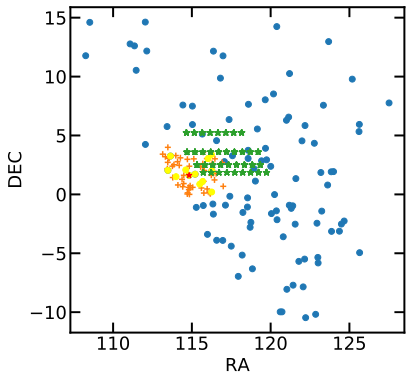

In [249]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)  



ax.scatter(skymodeldata_100['ra'],skymodeldata_100['dec'],zorder=0)
ax.scatter(skymodeldata_1000_infield['ra'],skymodeldata_1000_infield['dec'],zorder=0,marker='+')

ax.scatter(gleam_select_infield_0dot5Jy['RAJ2000'],gleam_select_infield_0dot5Jy['DEJ2000'],color='yellow',zorder=1)
ax.scatter(G0044_PKS0736_5deg['#RA'],G0044_PKS0736_5deg['#Dec'],zorder=3,marker='*')

plt.plot(114.825,1.618,marker='*',zorder=2,color='r')

set_ax_tick(ax)
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2         
plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(140,100)

## G0044_PKS0736_10deg

In [250]:
G0044_PKS0736_10deg= pd.read_csv(os.path.join(path_csv_project_dir,'G0044_PKS0736_10deg.csv'))

Text(0, 0.5, 'DEC')

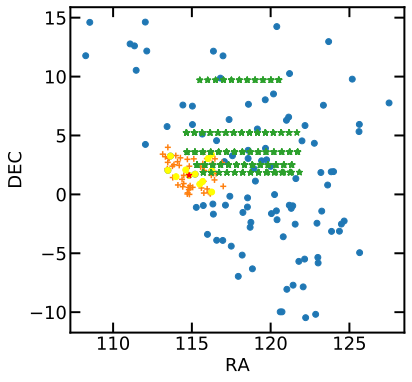

In [251]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)  



ax.scatter(skymodeldata_100['ra'],skymodeldata_100['dec'],zorder=0)
ax.scatter(skymodeldata_1000_infield['ra'],skymodeldata_1000_infield['dec'],zorder=0,marker='+')

ax.scatter(gleam_select_infield_0dot5Jy['RAJ2000'],gleam_select_infield_0dot5Jy['DEJ2000'],color='yellow',zorder=1)
ax.scatter(G0044_PKS0736_10deg['#RA'],G0044_PKS0736_10deg['#Dec'],zorder=3,marker='*')

plt.plot(114.825,1.618,marker='*',zorder=2,color='r')

set_ax_tick(ax)
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2         
plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(140,100)

# del_plot_image

In [8]:
def plot_image_dddd(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS0736+01',regionsize=1.5):
    fits_image_filename_hdu = fits.open(fits_image_filename)
    fits_image_filename_hdu[0].data *= 1e3

    del fits_image_filename_hdu[0].header['*[34]']
    fits_image_filename_hdu[0].header['NAXIS']=2
    fits_image_filename_hdu[0].data = fits_image_filename_hdu[0].data[0][0]
        
    fig_0 = plt.figure(figsize=(5, 5))
    fig = aplpy.FITSFigure(fits_image_filename_hdu,
                       figure=fig_0,
                       subplot=[0.,0.0,1.0,1.0])
    fig.show_colorscale()
    #fig.add_grid()
    fig.add_colorbar()
    fig.show_colorscale()

    fig.colorbar.set_location('top')
    fig.colorbar.set_pad(0.05)
    fig.colorbar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')

    fig.colorbar.set_axis_label_text('Flux Density (mJy/beam)')
    fig.colorbar.set_axis_label_pad(10)
    fig.colorbar.set_axis_label_rotation(0)
    fig.colorbar.set_axis_label_font(size=10, weight='bold')
    fig.colorbar.set_width(0.1)  # arbitrary units, default is 0.2
    
    
    fig.add_scalebar(length=1.0)
    fig.scalebar.show(1.0)  # length in degrees    
    fig.scalebar.set_corner('top right')
    fig.scalebar.set_color('white')
    fig.scalebar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
    fig.scalebar.set_linestyle('solid')
    fig.scalebar.set_linewidth(3)  # points
    fig.scalebar.set_label('1 degree')    
    
    
    fig.ticks.show()
    fig.ticks.set_color('black')
    fig.tick_labels.set_xformat('dd.dd')
    fig.tick_labels.set_yformat('dd.dd')
    #fig.tick_labels.set_xformat('hh:mm:ss')
    ##fig.tick_labels.set_yformat('dd:mm:ss')

    fig.show_regions(regfile)
    fig.show_circles(ra, dec, radius=0.2,)#x_world, y_world, radius
    #fig.add_label(ra,dec+0.08, name,color='yellow',fontsize=14)
    
#fig.add_scalebar(0.2)
#fig.scalebar.show(0.2)  # length in degrees
#fig.scalebar.set_length(15 * u.arcminute)

    fig.axis_labels.set_font(size='medium', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')

#fig.show_circles(33.23, 55.33, radius=0.3,)#x_world, y_world, radius
#fig.ticks.set_xspacing(0.25)  # degrees
#fig.ticks.set_yspacing(2.0)  # degrees    

    fig.ticks.set_minor_frequency(5)
    fig.tick_labels.set_font(size='large')
    fig.axis_labels.set_font(size='large')
    fig.colorbar.set_axis_label_font(size=14)
    #fig.axis_labels.set_xtext('Right Ascension (J2000)')
    #fig.axis_labels.set_ytext('Declination (J2000)')
#fig.set_system_latex(True)
#fig.set_theme('publication')
    fig.refresh()
    #fig.set_auto_refresh(True)

    fig_0.canvas.draw()
    #fig.savefig('mwa_aplpy_%s.png'%(fits_image_filename.split('/')[-1],), dpi=400,)  
    fits_image_filename_hdu.close()
    return fig

def plot_image_hhmmss(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS0736+01',regionsize=1.5):
    fits_image_filename_hdu = fits.open(fits_image_filename)
    fits_image_filename_hdu[0].data *= 1e3

    del fits_image_filename_hdu[0].header['*[34]']
    fits_image_filename_hdu[0].header['NAXIS']=2
    fits_image_filename_hdu[0].data = fits_image_filename_hdu[0].data[0][0]
        
    fig_0 = plt.figure(figsize=(5, 5))
    fig = aplpy.FITSFigure(fits_image_filename_hdu,
                       figure=fig_0,
                       subplot=[0.,0.0,1.0,1.0])
    fig.show_colorscale()
    #fig.add_grid()
    fig.add_colorbar()
    fig.show_colorscale()

    fig.colorbar.set_location('top')
    fig.colorbar.set_pad(0.05)
    fig.colorbar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')

    fig.colorbar.set_axis_label_text('Flux Density (mJy/beam)')
    fig.colorbar.set_axis_label_pad(10)
    fig.colorbar.set_axis_label_rotation(0)
    fig.colorbar.set_axis_label_font(size=10, weight='bold')
    fig.colorbar.set_width(0.1)  # arbitrary units, default is 0.2
    
    
    fig.add_scalebar(length=1.0)
    fig.scalebar.show(1.0)  # length in degrees    
    fig.scalebar.set_corner('top right')
    fig.scalebar.set_color('white')
    fig.scalebar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
    fig.scalebar.set_linestyle('solid')
    fig.scalebar.set_linewidth(3)  # points
    fig.scalebar.set_label('1 degree')    
    
    
    fig.ticks.show()
    fig.ticks.set_color('black')
    #fig.tick_labels.set_xformat('dd.dd')
    #fig.tick_labels.set_yformat('dd.dd')
    fig.tick_labels.set_xformat('hh:mm:ss')
    fig.tick_labels.set_yformat('dd:mm:ss')

    fig.show_regions(regfile)
    fig.show_circles(ra, dec, radius=0.2,)#x_world, y_world, radius
    #fig.add_label(ra,dec+0.08, name,color='yellow',fontsize=14)
    
#fig.add_scalebar(0.2)
#fig.scalebar.show(0.2)  # length in degrees
#fig.scalebar.set_length(15 * u.arcminute)

    fig.axis_labels.set_font(size='medium', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')

#fig.show_circles(33.23, 55.33, radius=0.3,)#x_world, y_world, radius
#fig.ticks.set_xspacing(0.25)  # degrees
#fig.ticks.set_yspacing(2.0)  # degrees    

    fig.ticks.set_minor_frequency(5)
    fig.tick_labels.set_font(size='large')
    fig.axis_labels.set_font(size='large')
    fig.colorbar.set_axis_label_font(size=14)
    #fig.axis_labels.set_xtext('Right Ascension (J2000)')
    #fig.axis_labels.set_ytext('Declination (J2000)')
#fig.set_system_latex(True)
#fig.set_theme('publication')
    fig.refresh()
    #fig.set_auto_refresh(True)

    fig_0.canvas.draw()
    #fig.savefig('mwa_aplpy_%s.png'%(fits_image_filename.split('/')[-1],), dpi=400,)  
    fits_image_filename_hdu.close()
    return fig

def plot_image_recenter(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS 0736+01',regionsize=1.5):
    fits_image_filename_hdu = fits.open(fits_image_filename)
    fits_image_filename_hdu[0].data *= 1e3

    del fits_image_filename_hdu[0].header['*[34]']
    fits_image_filename_hdu[0].header['NAXIS']=2
    fits_image_filename_hdu[0].data = fits_image_filename_hdu[0].data[0][0]
        
    fig_0 = plt.figure(figsize=(5, 5))
    fig = aplpy.FITSFigure(fits_image_filename_hdu,
                       figure=fig_0,
                       subplot=[0.,0.0,1.0,1.0])
    fig.show_colorscale()
    #fig.add_grid()
    fig.add_colorbar()
    fig.show_colorscale()

    fig.colorbar.set_location('top')
    fig.colorbar.set_pad(0.05)
    fig.colorbar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')

    fig.colorbar.set_axis_label_text('Flux Density (mJy/beam)')
    fig.colorbar.set_axis_label_pad(10)
    fig.colorbar.set_axis_label_rotation(0)
    fig.colorbar.set_axis_label_font(size=10, weight='bold')
    fig.colorbar.set_width(0.1)  # arbitrary units, default is 0.2

    

    #fig.ticks.show()
    fig.ticks.set_color('black')
    fig.tick_labels.set_xformat('dd.dd')
    fig.tick_labels.set_yformat('dd.dd')
    fig.ticks.set_minor_frequency(5)
    fig.tick_labels.set_font(size='large')
    fig.axis_labels.set_font(size='large')

    
    fig.show_regions(regfile)
    fig.show_circles(ra, dec, radius=0.2,)#x_world, y_world, radius
    fig.add_label(ra,dec+0.08, name,color='yellow',fontsize=14)


    fig.recenter(ra,dec, regionsize, regionsize)  # degrees
    
#fig.add_scalebar(0.2)
#fig.scalebar.show(0.2)  # length in degrees
#fig.scalebar.set_length(15 * u.arcminute)

    fig.axis_labels.set_font(size='medium', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')

#fig.show_circles(33.23, 55.33, radius=0.3,)#x_world, y_world, radius
#fig.ticks.set_xspacing(0.25)  # degrees
#fig.ticks.set_yspacing(2.0)  # degrees    

   
    fig.add_scalebar(length=0.2)
    fig.scalebar.show(0.2)  # length in degrees
    
    fig.scalebar.set_corner('top right')
    fig.scalebar.set_color('white')
    fig.scalebar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
    fig.scalebar.set_linestyle('solid')
    fig.scalebar.set_linewidth(3)  # points
    fig.scalebar.set_label('12 arcmin')

    #fig.axis_labels.set_xtext('Right Ascension (J2000)')
    #fig.axis_labels.set_ytext('Declination (J2000)')
#fig.set_system_latex(True)
#fig.set_theme('publication')
    fig.refresh()
    #fig.set_auto_refresh(True)
#fig.recenter(201,-43,radius=1)  # degrees
    fig_0.canvas.draw()
    #fig.savefig('mwa_aplpy_%s.png'%(fits_image_filename.split('/')[-1],), dpi=400,)  
    fits_image_filename_hdu.close()
    return fig

In [9]:
def def_show_markers(fig,skymodeldata,color='yellow'):
    ras=skymodeldata['ra']
    decs=skymodeldata['dec']
    fig.show_markers(ras, decs, layer='marker_set_2', edgecolor=color,
                facecolor='none', marker='o', s=50, alpha=1.0)
    
def def_add_label_loc(fig,skymodeldata,color='blue'):
    ras=skymodeldata['ra']
    decs=skymodeldata['dec']
    for ra_,dec_ in zip(ras,decs):
    #print('%.3f,%.3f'%(ra_,dec_))
        fig.add_label(ra_,dec_,'%.3f,%.3f'%(ra_,dec_),color=color,fontsize=14)

def def_add_label_name(fig,skymodeldata,color='red'):
    ras=skymodeldata['ra']
    decs=skymodeldata['dec']
    names=skymodeldata['Name']
    for ra_,dec_,name_ in zip(ras,decs,names):
    #print('%.3f,%.3f'%(ra_,dec_))
        fig.add_label(ra_,dec_,name_,color=color,fontsize=14)        
        
        
def def_show_gleam_markers(fig,gleam_data,ralabel='RAJ2000',declabel='DEJ2000',color='yellow'):
    ras=gleam_data[ralabel]
    decs=gleam_data[declabel]
    fig.show_markers(ras, decs, layer='marker_set_2', edgecolor=color,
                facecolor='none', marker='o', s=50, alpha=1.0)

def def_add_gleam_label_loc(fig,skymodeldata,ralabel='RAJ2000',declabel='DEJ2000',color='blue'):
    ras=skymodeldata[ralabel]
    decs=skymodeldata[declabel]
    for ra_,dec_ in zip(ras,decs):
    #print('%.3f,%.3f'%(ra_,dec_))
        fig.add_label(ra_,dec_,'%.3f,%.3f'%(ra_,dec_),color=color,fontsize=14)

def def_add_gleam_label_name(fig,skymodeldata,ralabel='RAJ2000',declabel='DEJ2000',namelabel='Name',color='red'):
    ras=skymodeldata[ralabel]
    decs=skymodeldata[declabel]
    names=skymodeldata[namelabel]
    for ra_,dec_,name_ in zip(ras,decs,names):
    #print('%.3f,%.3f'%(ra_,dec_))
        fig.add_label(ra_,dec_,name_,color=color,fontsize=14)        
        

## src1000_large3

In [ ]:
size=8000
scale=0.003

11 1207742664


INFO:astropy:Auto-setting vmin to -6.542e+02
INFO:astropy:Auto-setting vmax to  7.270e+02


INFO: Auto-setting vmin to -6.542e+02 [aplpy.core]
INFO: Auto-setting vmax to  7.270e+02 [aplpy.core]


INFO:astropy:Auto-setting vmin to -6.567e+02
INFO:astropy:Auto-setting vmax to  7.972e+02


INFO: Auto-setting vmin to -6.567e+02 [aplpy.core]
INFO: Auto-setting vmax to  7.972e+02 [aplpy.core]


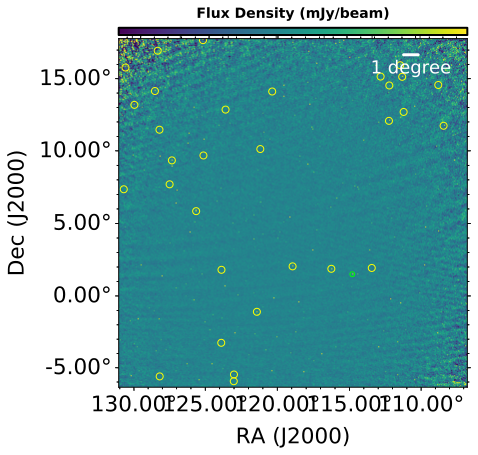

In [262]:
for i in range(11,12):   
    obsid=obsids_path_src1000_large3[i]
    print(i,obsid)
    regfile='/share/home/blv/mwa_code_py/PKS0736_src.reg'
    name='PKS0736+01'
    prefix='src1000_large3'
    fits_image_filename = '/share/home/blv/MWAdata/qguo_data/zip/157/src1000_large3//%s/stokes-%s-%s-I.fits'%(obsid,obsid,prefix)#sys.argv[1]
    fig_path=fits_image_filename[:-4]+'png'
    #print(len(skymodeldata_1000_midcenter_1Jy))
    fig=plot_image_dddd(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS0736+01')
    #fig=plot_image_recenter(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS0736+01',regionsize=30)
    def_show_gleam_markers(fig,gleam_large_center1_1Jy) 
    fig.savefig(fig_path,dpi=400)

0 1207652304


INFO:astropy:Auto-setting vmin to -1.834e+03
INFO:astropy:Auto-setting vmax to  2.074e+03


INFO: Auto-setting vmin to -1.834e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.074e+03 [aplpy.core]


INFO:astropy:Auto-setting vmin to -2.260e+03
INFO:astropy:Auto-setting vmax to  2.109e+03


INFO: Auto-setting vmin to -2.260e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.109e+03 [aplpy.core]
1 1207652904


INFO:astropy:Auto-setting vmin to -7.870e+02
INFO:astropy:Auto-setting vmax to  9.467e+02


INFO: Auto-setting vmin to -7.870e+02 [aplpy.core]
INFO: Auto-setting vmax to  9.467e+02 [aplpy.core]


INFO:astropy:Auto-setting vmin to -8.550e+02
INFO:astropy:Auto-setting vmax to  8.617e+02


INFO: Auto-setting vmin to -8.550e+02 [aplpy.core]
INFO: Auto-setting vmax to  8.617e+02 [aplpy.core]
2 1207654104


INFO:astropy:Auto-setting vmin to -1.579e+03
INFO:astropy:Auto-setting vmax to  1.919e+03


INFO: Auto-setting vmin to -1.579e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.919e+03 [aplpy.core]


INFO:astropy:Auto-setting vmin to -1.607e+03
INFO:astropy:Auto-setting vmax to  1.926e+03


INFO: Auto-setting vmin to -1.607e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.926e+03 [aplpy.core]
3 1207654704


INFO:astropy:Auto-setting vmin to -7.109e+02
INFO:astropy:Auto-setting vmax to  7.830e+02


INFO: Auto-setting vmin to -7.109e+02 [aplpy.core]
INFO: Auto-setting vmax to  7.830e+02 [aplpy.core]


INFO:astropy:Auto-setting vmin to -6.970e+02
INFO:astropy:Auto-setting vmax to  8.095e+02


INFO: Auto-setting vmin to -6.970e+02 [aplpy.core]
INFO: Auto-setting vmax to  8.095e+02 [aplpy.core]
4 1207655904


INFO:astropy:Auto-setting vmin to -1.206e+03
INFO:astropy:Auto-setting vmax to  1.517e+03


INFO: Auto-setting vmin to -1.206e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.517e+03 [aplpy.core]


INFO:astropy:Auto-setting vmin to -1.353e+03
INFO:astropy:Auto-setting vmax to  1.320e+03


INFO: Auto-setting vmin to -1.353e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.320e+03 [aplpy.core]
5 1207656504


INFO:astropy:Auto-setting vmin to -6.890e+02
INFO:astropy:Auto-setting vmax to  7.254e+02


INFO: Auto-setting vmin to -6.890e+02 [aplpy.core]
INFO: Auto-setting vmax to  7.254e+02 [aplpy.core]


INFO:astropy:Auto-setting vmin to -6.403e+02
INFO:astropy:Auto-setting vmax to  6.963e+02


INFO: Auto-setting vmin to -6.403e+02 [aplpy.core]
INFO: Auto-setting vmax to  6.963e+02 [aplpy.core]
6 1207738464


INFO:astropy:Auto-setting vmin to -2.039e+03
INFO:astropy:Auto-setting vmax to  2.207e+03


INFO: Auto-setting vmin to -2.039e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.207e+03 [aplpy.core]


INFO:astropy:Auto-setting vmin to -2.056e+03
INFO:astropy:Auto-setting vmax to  2.208e+03


INFO: Auto-setting vmin to -2.056e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.208e+03 [aplpy.core]
7 1207739064


INFO:astropy:Auto-setting vmin to -8.094e+02
INFO:astropy:Auto-setting vmax to  9.271e+02


INFO: Auto-setting vmin to -8.094e+02 [aplpy.core]
INFO: Auto-setting vmax to  9.271e+02 [aplpy.core]


INFO:astropy:Auto-setting vmin to -7.405e+02
INFO:astropy:Auto-setting vmax to  7.918e+02


INFO: Auto-setting vmin to -7.405e+02 [aplpy.core]
INFO: Auto-setting vmax to  7.918e+02 [aplpy.core]
8 1207740264


INFO:astropy:Auto-setting vmin to -1.600e+03
INFO:astropy:Auto-setting vmax to  1.403e+03


INFO: Auto-setting vmin to -1.600e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.403e+03 [aplpy.core]


INFO:astropy:Auto-setting vmin to -1.630e+03
INFO:astropy:Auto-setting vmax to  1.579e+03


INFO: Auto-setting vmin to -1.630e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.579e+03 [aplpy.core]
9 1207740864


INFO:astropy:Auto-setting vmin to -6.679e+02
INFO:astropy:Auto-setting vmax to  8.032e+02


INFO: Auto-setting vmin to -6.679e+02 [aplpy.core]
INFO: Auto-setting vmax to  8.032e+02 [aplpy.core]


INFO:astropy:Auto-setting vmin to -8.266e+02
INFO:astropy:Auto-setting vmax to  8.482e+02


INFO: Auto-setting vmin to -8.266e+02 [aplpy.core]
INFO: Auto-setting vmax to  8.482e+02 [aplpy.core]
10 1207742064


INFO:astropy:Auto-setting vmin to -1.388e+03
INFO:astropy:Auto-setting vmax to  1.209e+03


INFO: Auto-setting vmin to -1.388e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.209e+03 [aplpy.core]


INFO:astropy:Auto-setting vmin to -1.156e+03
INFO:astropy:Auto-setting vmax to  1.224e+03


INFO: Auto-setting vmin to -1.156e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.224e+03 [aplpy.core]
11 1207742664


INFO:astropy:Auto-setting vmin to -6.418e+02
INFO:astropy:Auto-setting vmax to  7.917e+02


INFO: Auto-setting vmin to -6.418e+02 [aplpy.core]
INFO: Auto-setting vmax to  7.917e+02 [aplpy.core]


INFO:astropy:Auto-setting vmin to -6.760e+02
INFO:astropy:Auto-setting vmax to  7.018e+02


INFO: Auto-setting vmin to -6.760e+02 [aplpy.core]
INFO: Auto-setting vmax to  7.018e+02 [aplpy.core]


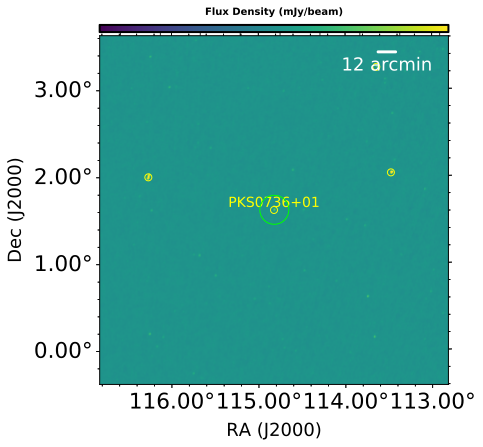

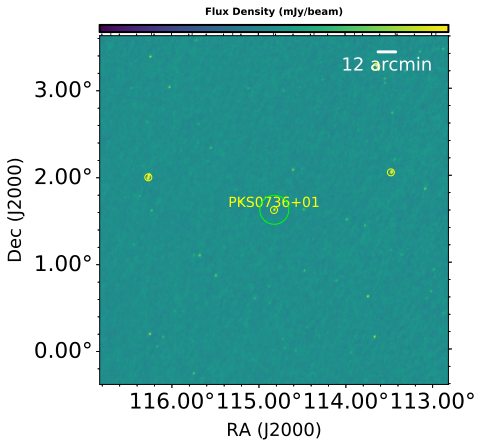

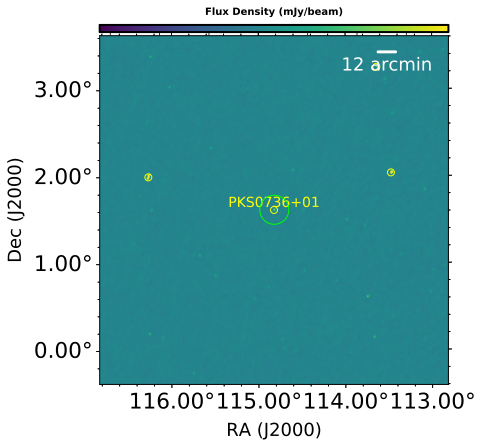

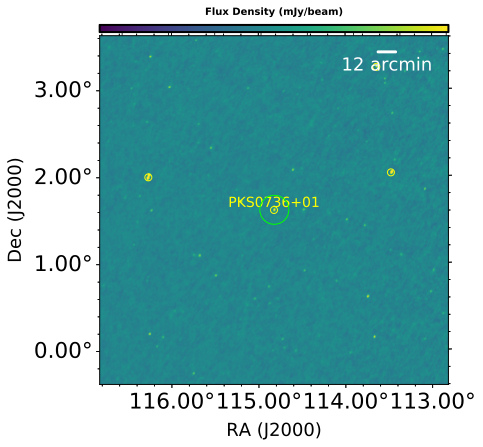

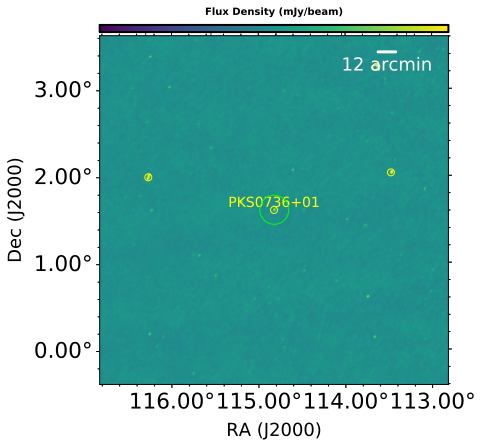

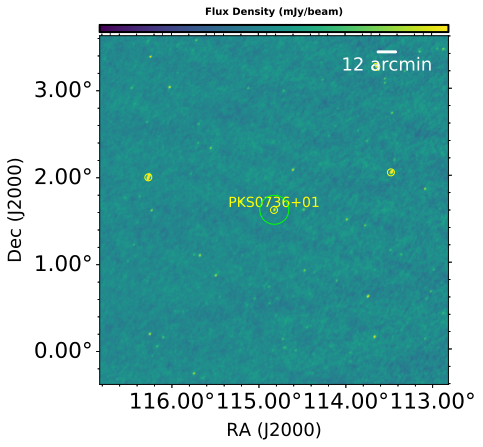

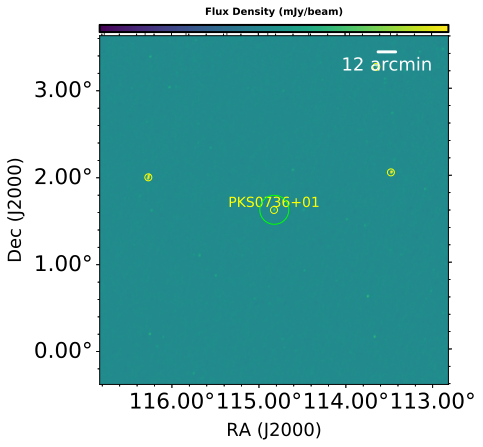

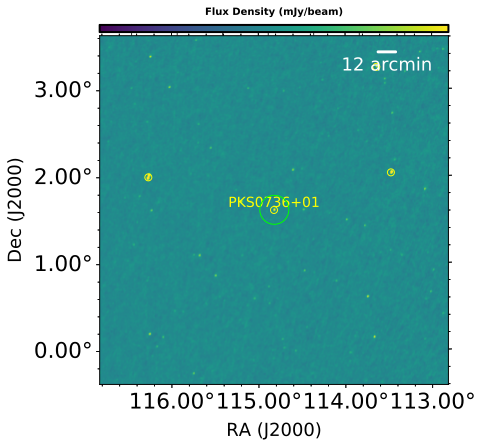

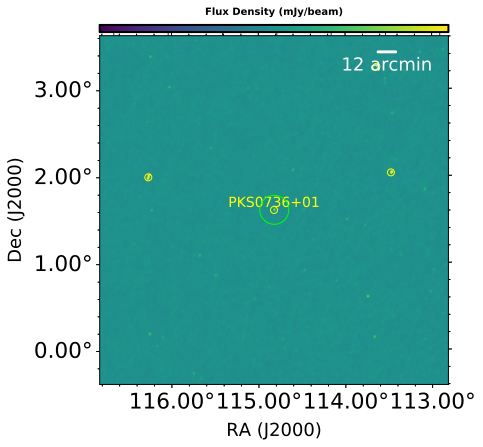

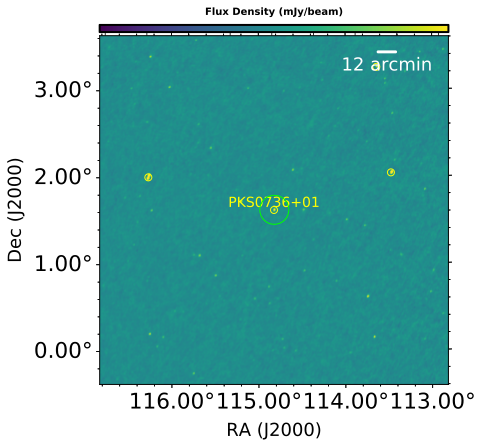

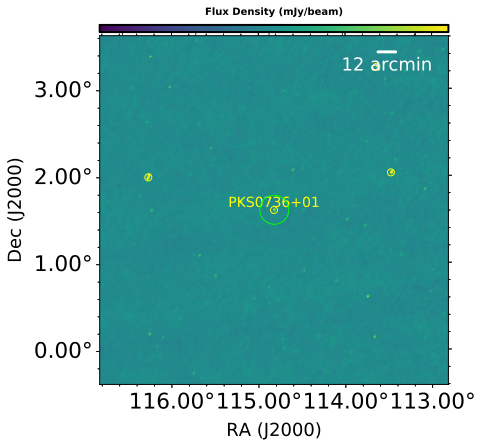

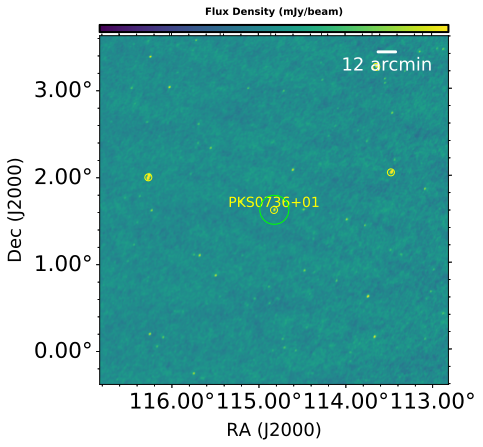

In [280]:
for i in range(0,12):   
    obsid=obsids_path_src1000_large3[i]
    print(i,obsid)
    regfile='/share/home/blv/mwa_code_py/PKS0736_src.reg'
    name='PKS0736+01'
    prefix='src1000_large3'
    fits_image_filename = '/share/home/blv/MWAdata/qguo_data/zip/157/src1000_large3//%s/stokes-%s-%s-I.fits'%(obsid,obsid,prefix)#sys.argv[1]
    
    #print(len(skymodeldata_1000_midcenter_1Jy))
    #fig=plot_image_dddd(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS0736+01')
    fig=plot_image_recenter(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS0736+01',regionsize=2)
    def_show_gleam_markers(fig,gleam_large_center1_1Jy) 
    
    
    fig.savefig(fig_path,dpi=400)

## selfcal_3

INFO:astropy:Auto-setting vmin to -1.395e+03
INFO:astropy:Auto-setting vmax to  1.778e+03


INFO: Auto-setting vmin to -1.395e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.778e+03 [aplpy.core]


INFO:astropy:Auto-setting vmin to -1.443e+03
INFO:astropy:Auto-setting vmax to  1.752e+03


INFO: Auto-setting vmin to -1.443e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.752e+03 [aplpy.core]


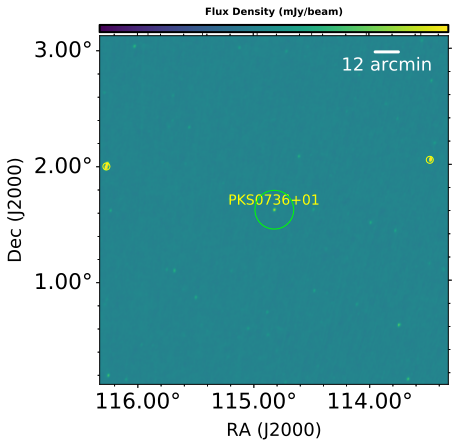

In [277]:
for i in range(1):   
    obsid=obsids_path_157[i]
    regfile='/share/home/blv/mwa_code_py/PKS0736_src.reg'
    name='PKS0736+01'
    prefix='selfcal_3'
    fits_image_filename = '/share/home/blv/MWAdata/qguo_data/zip/157/src1000_large3/%s/stokes-%s-%s-I.fits'%(obsid,obsid,prefix)#sys.argv[1]
    #print(len(skymodeldata_1000_midcenter_1Jy))
    fig=plot_image_recenter(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS0736+01',regionsize=1.5)
    #def_show_markers(fig,skymodeldata_100) 
    def_show_gleam_markers(fig,gleam_large_center1_1Jy) 
    fig_path=fits_image_filename[:-5]+'_recenter_2'+'.png'
    fig.savefig(fig_path,dpi=400)

# read_tables

In [11]:
def get_table_file(path,obsid,prefix):
    obsid_path=os.path.join(path,obsid)
    imgfile = os.path.join(obsid_path,'stokes-%s-%s-I_out_comp.fits'%(obsid,prefix))   
    if os.path.exists(imgfile):
        return imgfile
    else:
        return False

def read_tables(path,obsid,prefix):
    table_name=get_table_file(path,obsid,prefix)
    
    if table_name: 
        table = Table.read(table_name)
        #print(table_PKS0736)
        return table
    else:
        return False
    
def get_stokes_image_freq_err_of_obsid(path,obsid,prefix='briggsplus1'):  
    stokes_file_I=os.path.join(path,obsid,'stokes-%s-%s-I.fits'%(obsid,prefix))
    if os.path.exists(stokes_file_I):      
        hdl_stokes_I=fits.open(stokes_file_I)            
        return stokes_file_I,int(hdl_stokes_I[0].header['CRVAL3']*u.Hz.to(u.MHz)),hdl_stokes_I[0].header['CDELT3']*u.Hz.to(u.MHz)
    else:
        return False,0,0 

# def return_table_of_onesource

In [39]:
def return_table_of_onesource(path,ra=114.825,dec=1.618,prefix='briggsplus1'):
    obsnums=get_obsids(path)
    no_select_obsids=[]
    no_table_obsids=[]
    with_noise_obsids=[]
    df_ = pd.DataFrame(columns=["obsid", "mjd", "freq","int_flux","err_int_flux","peak_flux","err_peak_flux"])
    
    #mjd0=Time(obsnums[0], format='gps').mjd
    #intmjd0=math.floor(mjd0)  
    
    for obsid in obsnums:              
        stokes_file_I,freq_central,freq_delta=get_stokes_image_freq_err_of_obsid(path,obsid,prefix)
        freq=int(freq_central)        

        table_=read_tables(path,obsid,prefix)
        if table_:
            select_=table_[abs(table_['ra']-ra)<0.01]
            select_=select_[abs(select_['dec']-dec)<0.01] 
            
            if len(select_)>0:  
                mjd=Time(obsid, format='gps').mjd
                flux=select_['int_flux'].quantity[0]
                flux_err=select_['err_int_flux'].quantity[0]
                peak_flux=select_['peak_flux'].quantity[0] 
                err_peak_flux=select_['err_peak_flux'].quantity[0] 
                color=color_dict_band[freq]       
                
                if flux_err>0 and flux_err<1.0:               
                    df_=df_.append(
                        pd.Series({"obsid":obsid, "mjd":mjd,"freq":freq,
                        "int_flux":flux,"err_int_flux":flux_err,
                        "peak_flux":peak_flux,"err_peak_flux":err_peak_flux,
                        "ra":ra,"dec":dec}), 
                        ignore_index=True)                
                else:

                    with_noise_obsids.append(obsid)                    
               
            else:
                no_select_obsids.append(obsid)
        else:
            no_table_obsids.append(obsid)
            
    return no_table_obsids,no_select_obsids, with_noise_obsids,df_

# lightcurve

## def plot_sources_lightcurve

In [46]:
def plot_sources_lightcurve(path,skymodeldata,calibration_data,intmjd0=58221,prefix='briggsplus1',imgprefix='skymodel',savefig=False):
 
    ras=skymodeldata['ra']
    decs=skymodeldata['dec']
    names=skymodeldata['Name']
    
    
    for index,(ra_,dec_,name_) in enumerate(zip(ras,decs,names)):    

        lc_path_img='%s/lc_%s_%d_%s_%.3f_%.3f.png'%(path_lc,imgprefix,index,name_,ra_,dec_)                         
        no_table_obsids,no_select_obsids, with_noise_obsids,df_= \
                return_table_of_onesource(path,ra_,dec_,prefix)
        
        if len(df_)>2:   
            
        #ax.errorbar(mjdtime_frac*24,flux,yerr=flux_err,marker='.',color=color,label=str(freq))
            fig = plt.figure(figsize=(6,4))
            ax = fig.add_subplot(111)   
            set_ax_tick(ax) 
        

            ax.errorbar((df_['mjd']-intmjd0)*24,df_['int_flux'],yerr=df_['err_int_flux'],
                        ls='',
                        marker='.',color=colors_cm_10(9),label=name_)

            calibration_freq,calibration_flux=calibration_data[calibration_data['Name']==name_]['freq'], calibration_data[calibration_data['Name']==name_]['flux']                        
            if calibration_freq:
    
                ax.axhline(calibration_flux,color='b',ls='--',lw=2)  
                ax.text(1.2, 0.5, 'SM %s MHz %sJy'%(calibration_freq[0],calibration_flux[0]), 
                        horizontalalignment = 'center', verticalalignment = 'center', 
                        transform = ax.transAxes, fontsize = 11,color='b')

                gleam_calibration=gleamdata[gleamdata['Name']=='GLEAM '+name_]          
                ax.axhline(gleam_calibration['int_flux_220'],color='r',ls='--',lw=2)
                ax.text(1.2, 0.6, 'gleam 220 MHz %.2fJy'%gleam_calibration['int_flux_220'][0],
                                 horizontalalignment = 'center', verticalalignment = 'center', 
                                  transform = ax.transAxes, fontsize = 11,color='r')
            texts = [ax.text((df_['mjd'][j]-intmjd0)*24,df_['int_flux'][j],df_['obsid'][j],fontsize=9) for j in range(len(df_))]

            adjust_text(texts,ax=ax,#arrowprops=dict(arrowstyle='->', color='red',lw=0.5),
            expand_text=(1.15,1.3),
            expand_points=(1.15,1.3),
            expand_objects=(1.15, 1.3),
            expand_align=(1.15, 1.3),
            autoalign='xy',
           #only_move={'points':'x', 'text':'x'}
            ) #使用adjust_text     
            handles, labels = ax.get_legend_handles_labels()
            hdl = [h[0] for h in handles]
            by_label = OrderedDict(zip(labels, hdl)) 
            ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 1.0),
                 loc=2, numpoints=1,ncol=1, fontsize=11.)

            plt.title(name_)
            ax.set_xlabel('MJD-%s (hours)'%intmjd0)
            ax.set_ylabel('Jy') 
            plt.rcParams['font.size'] = 18
            plt.rcParams['axes.linewidth'] = 2 

            if savefig: 
                fig.savefig(lc_path_img, dpi=400, transparent=False, bbox_inches='tight')
                
        else:
            print(index,name_,'no lc')

0 J074504+020010 no lc


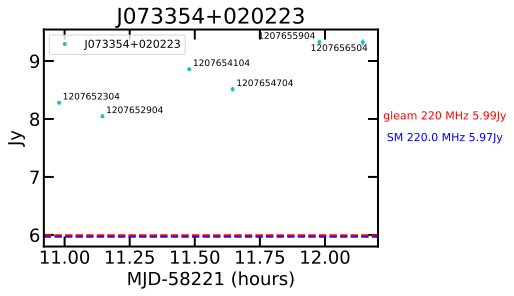

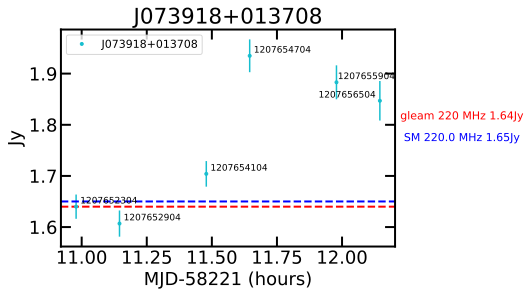

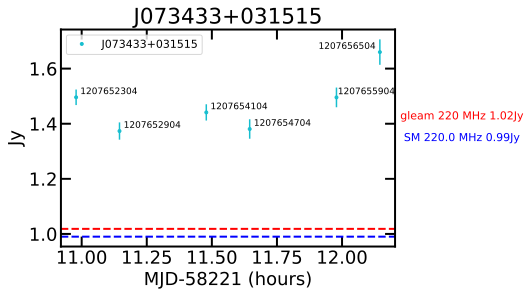

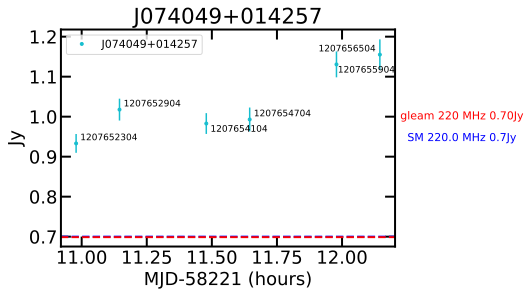

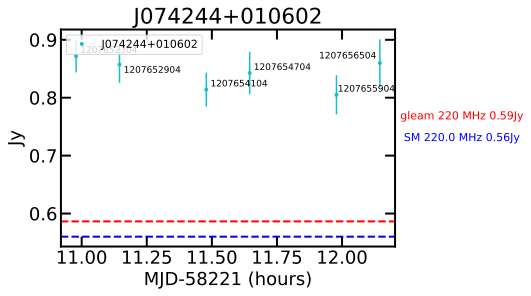

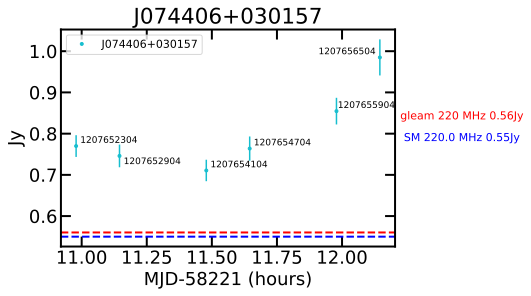

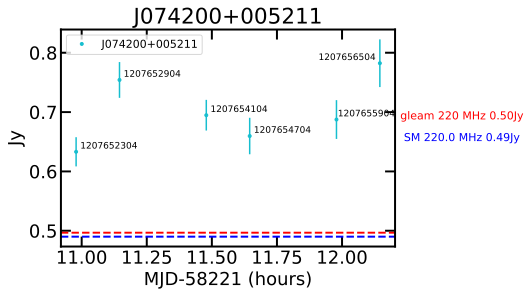

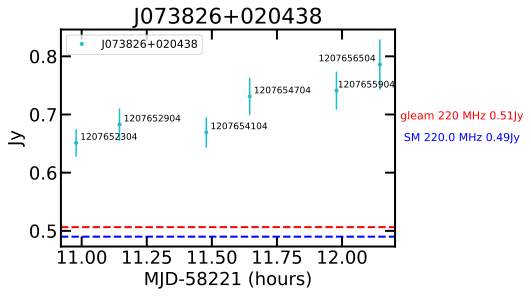

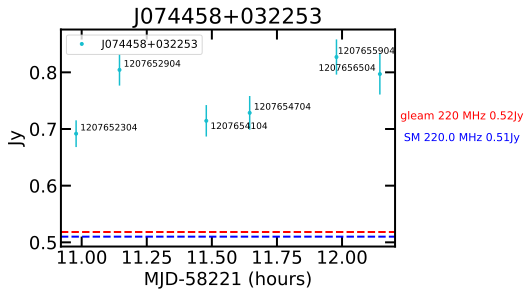

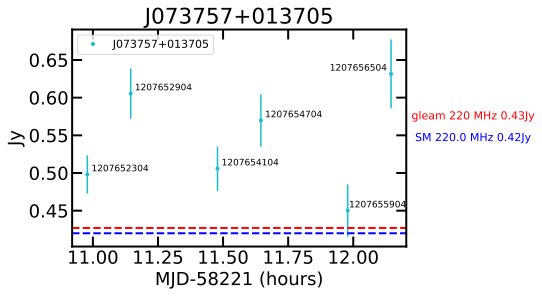

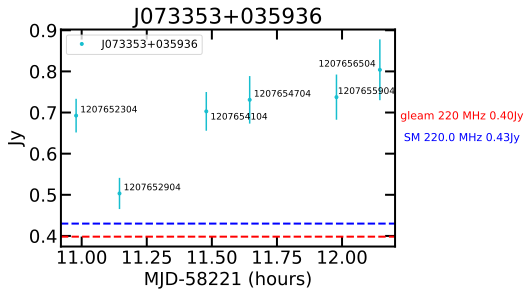

In [50]:
plot_sources_lightcurve(path_157,skymodeldata_1000_infield_1Jy,calibration_1000_data_220,intmjd0=58221,prefix='src1000_large1',imgprefix='src1000_large1',savefig=True)

0 J074504+020010 no lc


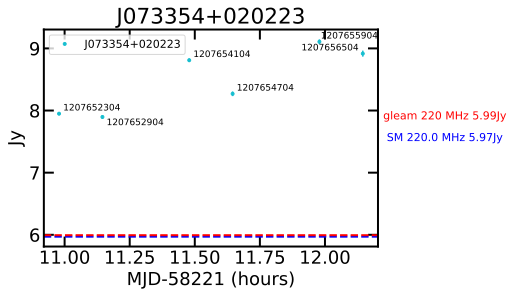

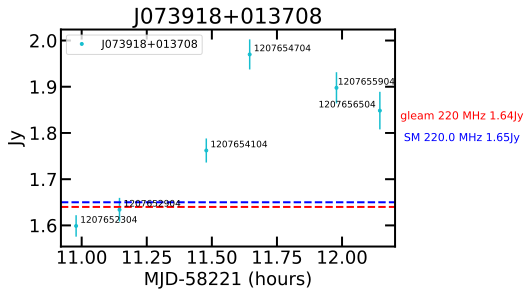

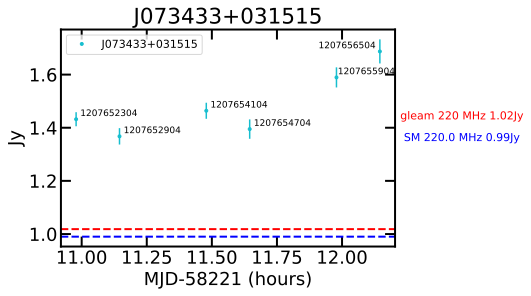

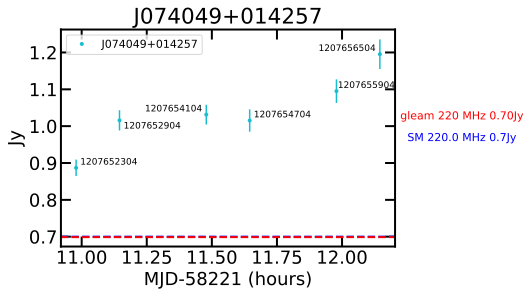

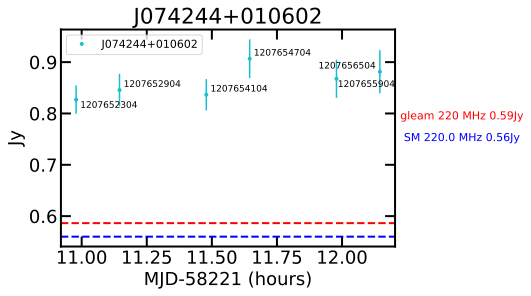

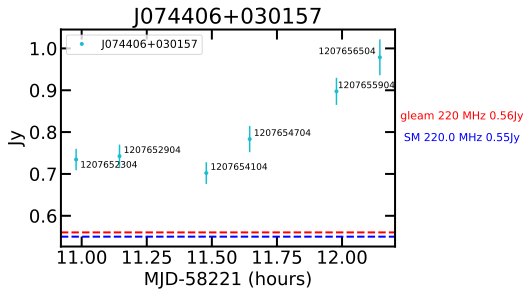

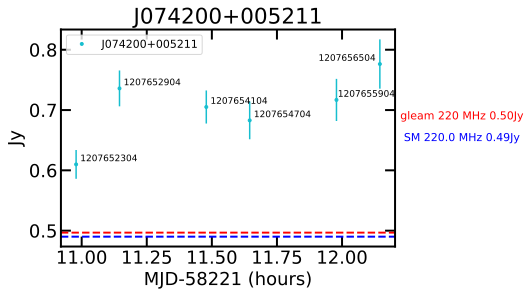

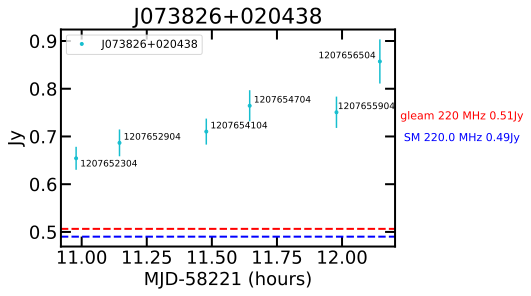

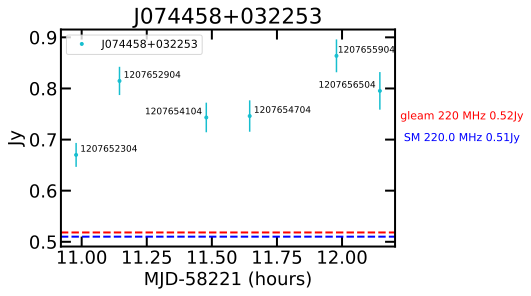

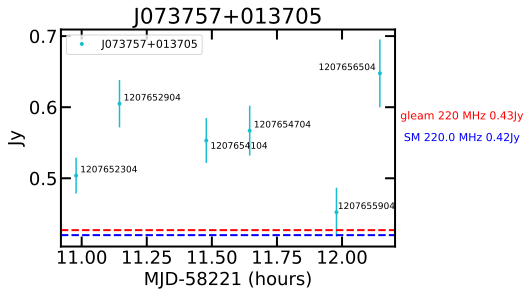

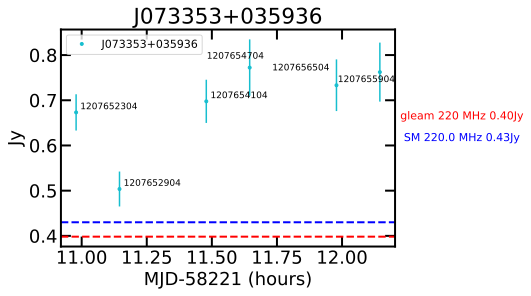

In [51]:
plot_sources_lightcurve(path_157,skymodeldata_1000_infield_1Jy,calibration_1000_data_220,intmjd0=58221,prefix='selfcal_1',imgprefix='selfcal_1',savefig=True)

0 J074504+020010 no lc


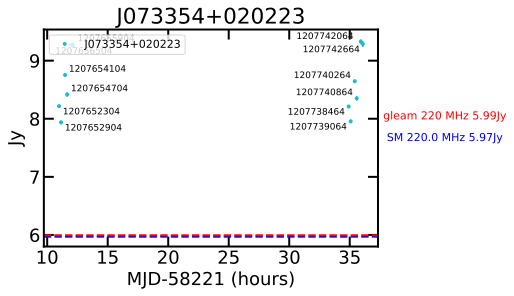

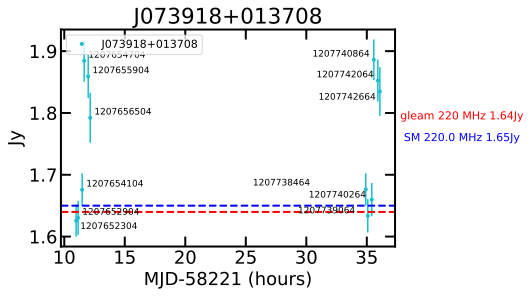

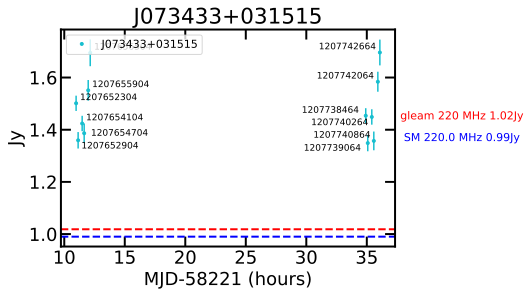

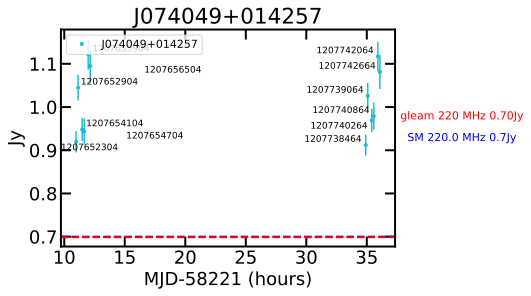

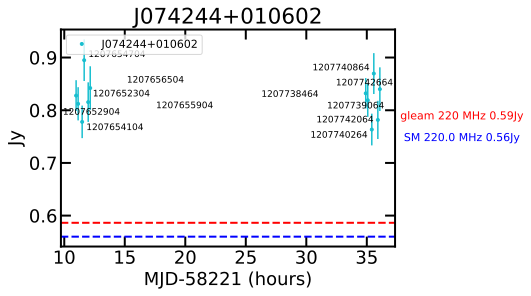

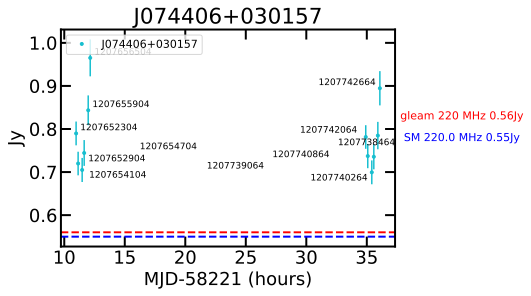

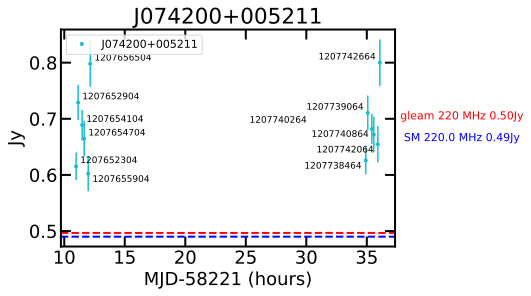

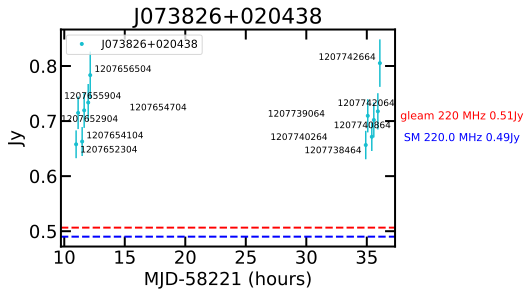

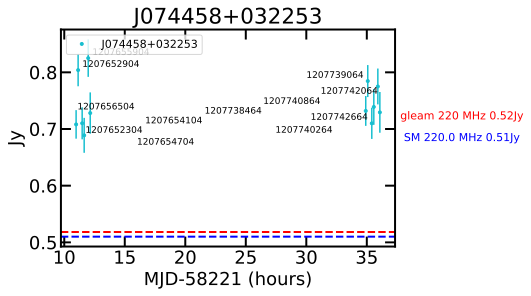

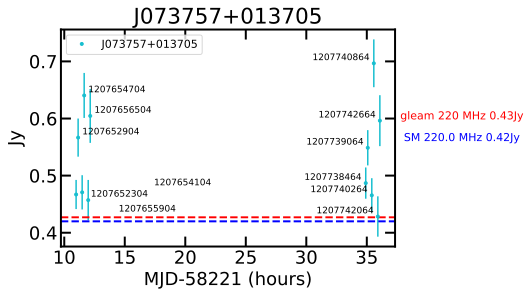

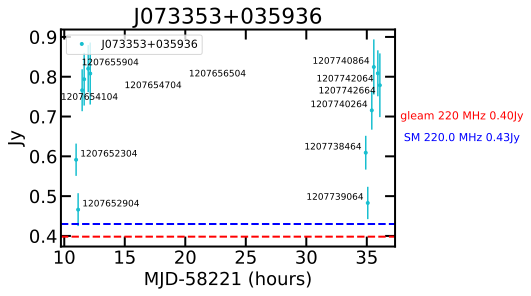

In [52]:
plot_sources_lightcurve(path_src1000_large3,skymodeldata_1000_infield_1Jy,calibration_1000_data_220,intmjd0=58221,prefix='src1000_large3',imgprefix='src1000_large3',savefig=True)

## plot_ratio_calibration_data_one_obsid_ra

In [73]:
def plot_ratio_calibration_data_one_obsid_ra(path,obsid,img,skymodeldata,calibration_data,intmjd0=58221,prefix='briggsplus1',gleamlabel=False):
    
    if gleamlabel==True:
        ralabel='RAJ2000'
        declabel='DEJ2000'
        calflux_label='int_flux_220'
        lc_path_img='%s/lc_ratio_%s_ra_gleam_%s.png'%(path_lc_ratio,obsid,img)
        
    else:
        ralabel='ra'
        declabel='dec'
        calflux_label='flux'
        lc_path_img='%s/lc_ratio_%s_ra_%s.png'%(path_lc_ratio,obsid,img)
    
    tableflux_label='int_flux'
    
    table=read_tables(path,obsid,prefix)
    ras=skymodeldata[ralabel]
    decs=skymodeldata[declabel]
    names=skymodeldata['Name']

    
    flux_ratio=[]
    ras_ratio=[]
    decs_ratio=[]
    
    for index,(ra_,dec_,name_) in enumerate(zip(ras,decs,names)):     

        table_source=table[abs(table['ra']-ra_)<0.01]
        table_source=table_source[abs(table_source['dec']-dec_)<0.01]

        if gleamlabel==True:   
            #gleam_calibration=gleamdata[gleamdata['Name']=='GLEAM '+name_]  
            gleam_calibration=gleamdata[gleamdata['Name']==name_]  
            calibration_flux=gleam_calibration[calflux_label]      

        else:    
            calibration_flux=calibration_data[calibration_data['Name']==name_]['flux'][0]      

        if len(table_source)>0:

            table_source_flux=table_source[tableflux_label][0]    
            
            plt.plot(ra_,table_source_flux/calibration_flux,ls='',marker='.')
            plt.ylabel('Int_Flux/Cal_Flux')
            plt.xlabel('RA')
            
            flux_ratio.append(table_source_flux/calibration_flux)
            ras_ratio.append(ra_)
            decs_ratio.append(dec_)
            
    return flux_ratio,ras_ratio,decs_ratio,lc_path_img    

/share/home/blv/MWAdata/qguo_data/lightcurve/lc_ratio/lc_ratio_1207652304_ra_src1000.png


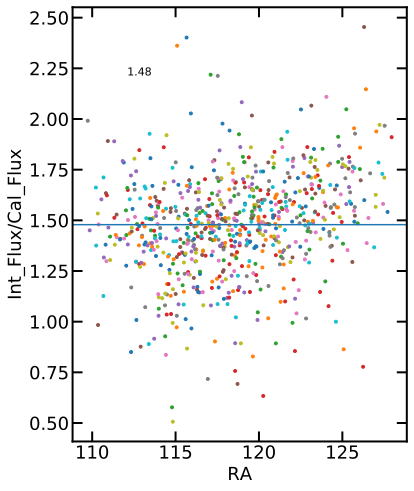

In [69]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)   
set_ax_tick(ax) 

flux_ratio,ras_ratio,decs_ratio,lc_path_img =plot_ratio_calibration_data_one_obsid_ra(path_157,obsids_path_157[0],'src1000',skymodeldata_1000,calibration_1000_data_220,intmjd0=58221,prefix='src1000_large1',)
print(lc_path_img)
print('flux_ratio',len(flux_ratio))
ax.axhline(np.mean(flux_ratio))
ax.text(0.2, 0.85, '%.2f'%np.mean(flux_ratio), horizontalalignment = 'center', verticalalignment = 'center', transform = ax.transAxes, fontsize = 11)

plt.savefig(lc_path_img, dpi=400, transparent=False, bbox_inches='tight')        

/share/home/blv/MWAdata/qguo_data/lightcurve/lc_ratio/lc_ratio_1207652304_ra_src100.png


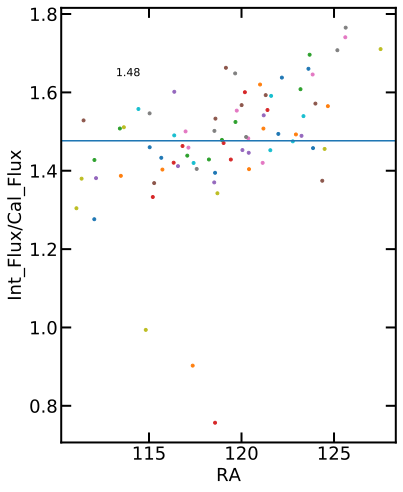

In [70]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)   
set_ax_tick(ax) 

flux_ratio,ras_ratio,decs_ratio,lc_path_img =plot_ratio_calibration_data_one_obsid_ra(path_157,obsids_path_157[0],'src100',skymodeldata_100,calibration_1000_data_220,intmjd0=58221,prefix='src1000_large1',)
print(lc_path_img)
print('flux_ratio',len(flux_ratio))
ax.axhline(np.mean(flux_ratio))
ax.text(0.2, 0.85, '%.2f'%np.mean(flux_ratio), horizontalalignment = 'center', verticalalignment = 'center', transform = ax.transAxes, fontsize = 11)
plt.savefig(lc_path_img, dpi=400, transparent=False, bbox_inches='tight')        

/share/home/blv/MWAdata/qguo_data/lightcurve/lc_ratio/lc_ratio_1207652304_ra_src1000_infield.png
flux_ratio 11


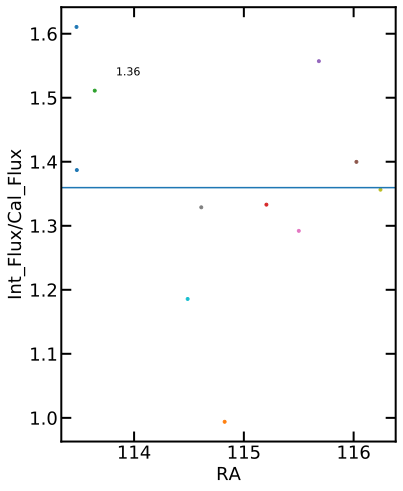

In [61]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)   
set_ax_tick(ax) 

flux_ratio,ras_ratio,decs_ratio,lc_path_img =plot_ratio_calibration_data_one_obsid_ra(path_157,obsids_path_157[0],'src1000_infield',skymodeldata_1000_infield_1Jy,calibration_1000_data_220,intmjd0=58221,prefix='src1000_large1',)
print(lc_path_img)
print('flux_ratio',len(flux_ratio))
ax.axhline(np.mean(flux_ratio))
ax.text(0.2, 0.85, '%.2f'%np.mean(flux_ratio), horizontalalignment = 'center', verticalalignment = 'center', transform = ax.transAxes, fontsize = 11)
plt.savefig(lc_path_img, dpi=400, transparent=False, bbox_inches='tight')        

/share/home/blv/MWAdata/qguo_data/lightcurve/lc_ratio/lc_ratio_1207652304_ra_gleam_gleam_infield.png
flux_ratio 99


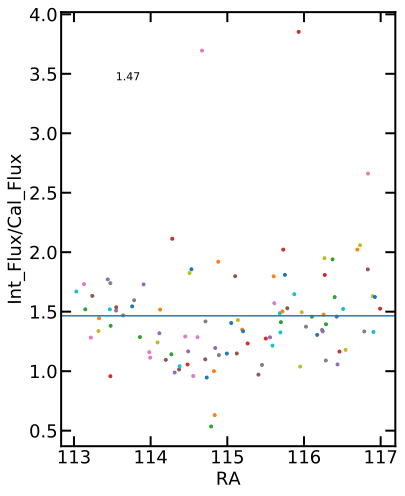

In [71]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)   
set_ax_tick(ax) 

flux_ratio,ras_ratio,decs_ratio,lc_path_img =plot_ratio_calibration_data_one_obsid_ra(path_157,obsids_path_157[0],'gleam_infield',gleam_select_infield,calibration_1000_data_220,intmjd0=58221,prefix='src1000_large1',gleamlabel=True)

print(lc_path_img)
print('flux_ratio',len(flux_ratio))
ax.axhline(np.mean(flux_ratio))
ax.text(0.2, 0.85, '%.2f'%np.mean(flux_ratio), horizontalalignment = 'center', verticalalignment = 'center', transform = ax.transAxes, fontsize = 11)

plt.savefig(lc_path_img, dpi=400, transparent=False, bbox_inches='tight')        

## plot_ratio_calibration_data_one_obsid_dec

In [72]:
def plot_ratio_calibration_data_one_obsid_dec(path,obsid,img,skymodeldata,calibration_data,intmjd0=58221,prefix='briggsplus1',gleamlabel=False):
    
    if gleamlabel==True:
        ralabel='RAJ2000'
        declabel='DEJ2000'
        calflux_label='int_flux_220'
        lc_path_img='%s/lc_ratio_%s_dec_gleam_%s.png'%(path_lc_ratio,obsid,img)
        
    else:
        ralabel='ra'
        declabel='dec'
        calflux_label='flux'
        lc_path_img='%s/lc_ratio_%s_dec_%s.png'%(path_lc_ratio,obsid,img)
    
    tableflux_label='int_flux'
    
    table=read_tables(path,obsid,prefix)
    ras=skymodeldata[ralabel]
    decs=skymodeldata[declabel]
    names=skymodeldata['Name']

    
    flux_ratio=[]
    ras_ratio=[]
    decs_ratio=[]
    
    for index,(ra_,dec_,name_) in enumerate(zip(ras,decs,names)):     

        table_source=table[abs(table['ra']-ra_)<0.01]
        table_source=table_source[abs(table_source['dec']-dec_)<0.01]

        if gleamlabel==True:   
            #gleam_calibration=gleamdata[gleamdata['Name']=='GLEAM '+name_]  
            gleam_calibration=gleamdata[gleamdata['Name']==name_]  
            calibration_flux=gleam_calibration[calflux_label]      

        else:    
            calibration_flux=calibration_data[calibration_data['Name']==name_]['flux'][0]      

        if len(table_source)>0:

            table_source_flux=table_source[tableflux_label][0]    
            
            plt.plot(dec_,table_source_flux/calibration_flux,ls='',marker='.')
            plt.ylabel('Int_Flux/Cal_Flux')
            plt.xlabel('DEC')
            
            flux_ratio.append(table_source_flux/calibration_flux)
            ras_ratio.append(ra_)
            decs_ratio.append(dec_)
            

    return flux_ratio,ras_ratio,decs_ratio,lc_path_img    

/share/home/blv/MWAdata/qguo_data/lightcurve/lc_ratio/lc_ratio_1207652304_dec_src1000_infield.png
flux_ratio 11


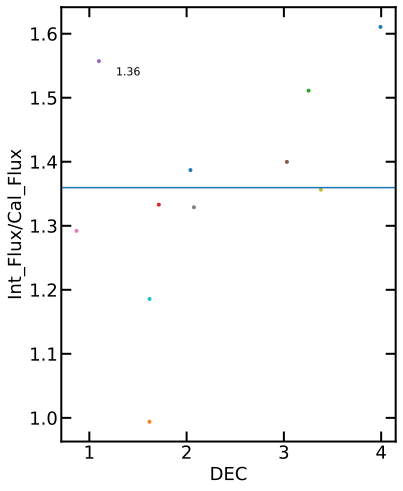

In [74]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)   
set_ax_tick(ax) 

flux_ratio,ras_ratio,decs_ratio,lc_path_img =plot_ratio_calibration_data_one_obsid_dec(path_157,obsids_path_157[0],'src1000_infield',skymodeldata_1000_infield_1Jy,calibration_1000_data_220,intmjd0=58221,prefix='src1000_large1',)
print(lc_path_img)
print('flux_ratio',len(flux_ratio))
ax.axhline(np.mean(flux_ratio))
ax.text(0.2, 0.85, '%.2f'%np.mean(flux_ratio), horizontalalignment = 'center', verticalalignment = 'center', transform = ax.transAxes, fontsize = 11)

plt.savefig(lc_path_img, dpi=400, transparent=False, bbox_inches='tight')        

/share/home/blv/MWAdata/qguo_data/lightcurve/lc_ratio/lc_ratio_1207652304_dec_gleam_gleam_infield.png
flux_ratio 99


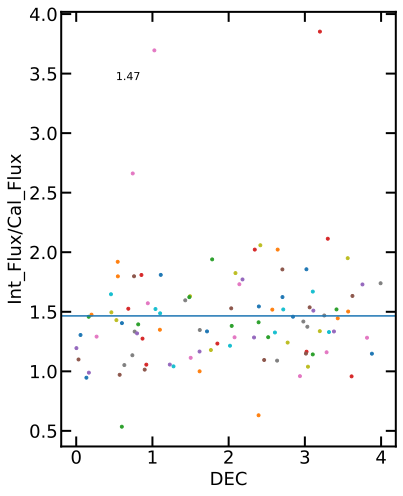

In [75]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)   
set_ax_tick(ax) 

flux_ratio,ras_ratio,decs_ratio,lc_path_img =plot_ratio_calibration_data_one_obsid_dec(path_157,obsids_path_157[0],'gleam_infield',gleam_select_infield,calibration_1000_data_220,intmjd0=58221,prefix='src1000_large1',gleamlabel=True)

print(lc_path_img)
print('flux_ratio',len(flux_ratio))
ax.axhline(np.mean(flux_ratio))
ax.text(0.2, 0.85, '%.2f'%np.mean(flux_ratio), horizontalalignment = 'center', verticalalignment = 'center', transform = ax.transAxes, fontsize = 11)

plt.savefig(lc_path_img, dpi=400, transparent=False, bbox_inches='tight')        

## def plot_calibrate_lightcurve

In [94]:
def plot_calibrate_lightcurve(path,target_index,skymodeldata,cal_index,skymodelCAldata,calibration_data,intmjd0=58221,prefix='briggsplus1',):
    obsids=get_obsids(path) 
    ra_target=skymodeldata['ra'][target_index]
    dec_target=skymodeldata['dec'][target_index]
    name_target=skymodeldata['Name'][target_index]
    
    
    ra_cal=skymodelCAldata['ra'][cal_index]
    dec_cal=skymodelCAldata['dec'][cal_index]
    name_cal=skymodelCAldata['Name'][cal_index]
    
    
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)   
    set_ax_tick(ax) 
    
    lc_path_img='%s/lc_target_%d_%s_cal_%d_%s.png'%(path_calibrate_lightcurve,target_index,
                                                    name_target,cal_index,name_cal)
             
    calibration_freq_cal,calibration_flux_cal=calibration_data[calibration_data['Name']==name_cal]['freq'],calibration_data[calibration_data['Name']==name_cal]['flux']            
    calibration_freq_target,calibration_flux_target=calibration_data[calibration_data['Name']==name_target]['freq'],calibration_data[calibration_data['Name']==name_target]['flux']            
    
    print('calibration_flux_cal',calibration_flux_cal[0])
    print('calibration_flux_target',calibration_flux_target[0])
    
    ax.axhline(calibration_flux_target,color='b',ls='-',lw=1)  
    ax.text(1.2, 0.5, 'SM %s MHz %sJy'%(calibration_freq_target[0],calibration_flux_target[0]), 
                horizontalalignment = 'center', verticalalignment = 'center', 
                transform = ax.transAxes, fontsize = 11,color='b')

    gleam_calibration=gleamdata[gleamdata['Name']=='GLEAM '+name_target]          
    ax.axhline(gleam_calibration['int_flux_220'],color='r',ls='-',lw=1)
    ax.text(1.2, 0.6, 'gleam 220 MHz %.2fJy'%gleam_calibration['int_flux_220'][0],
                         horizontalalignment = 'center', verticalalignment = 'center', 
                          transform = ax.transAxes, fontsize = 11,color='r')
    counts=0
    
    for index,obsid in enumerate(obsids):
        
        table_=read_tables(path,obsid,prefix)
        
        table_target=table_[abs(table_['ra']-ra_target)<0.01]
        table_target=table_target[abs(table_target['dec']-dec_target)<0.01] 
        
        table_cal=table_[abs(table_['ra']-ra_cal)<0.01]
        table_cal=table_cal[abs(table_cal['dec']-dec_cal)<0.01]
        
        if len(table_cal)>0 and len(table_target)>0:
            counts+=1
            
            obs_target_flux=table_target['int_flux'].quantity[0]              
            obs_target_flux_err=table_target['err_int_flux'].quantity[0]
        
 
            obs_cal_flux=table_cal['int_flux'].quantity[0]  
            obs_cal_flux_err=table_cal['err_int_flux'].quantity[0]  
              

            mjd=Time(obsid, format='gps').mjd
            
            calibrated_flux=obs_target_flux*calibration_flux_cal[0]/obs_cal_flux
            calibrated_flux_err=  ((obs_target_flux_err/obs_target_flux)**2+ (obs_cal_flux_err/obs_cal_flux)**2)**0.5*calibrated_flux
            
            ax.errorbar((mjd-intmjd0)*24,calibrated_flux,
                        yerr=calibrated_flux_err,
                    #ls='-.',
                    marker='^',
                    color=colors_cm_10(1),
                    label='cal_of_target:'+name_target)#+'\n'+'cal_with:'+name_cal)  
            
            ax.errorbar((mjd-intmjd0)*24,obs_target_flux,
                        yerr=obs_target_flux_err,
                    #ls='-.',
                    marker='v',
                    color=colors_cm_10(0),
                    label='obs_of_target:'+name_target) 
            
            ax.errorbar((mjd-intmjd0)*24,obs_cal_flux,
                        yerr=obs_cal_flux_err,
                    #ls='-.',
                    marker='.',
                    color=colors_cm_10(2),
                    label='obs_of_cal:'+name_cal)
            
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    hdl = [h[0] for h in handles]
    # use them in the legend
    by_label = OrderedDict(zip(labels, hdl)) 
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.0, 1.0),
             loc=2, numpoints=1,ncol=1, fontsize=11.)

    plt.title(name_target+'_%.3f_%.3f'%(ra_target,dec_target))
    ax.set_xlabel('MJD-%s (hours)'%intmjd0)
    ax.set_ylabel('Target lc with calibration ') 
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.linewidth'] = 2 
    if counts>0:
        fig.savefig(lc_path_img, dpi=400, transparent=False, bbox_inches='tight')

cal J073354+020223
target J073918+013708
calibration_flux_cal 5.97
calibration_flux_target 1.65


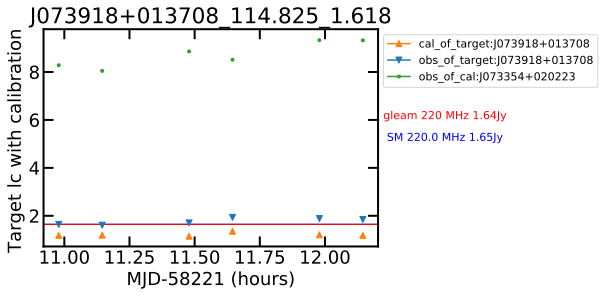

In [95]:
target_index,cal_index=2,1
print('cal',skymodeldata_1000_infield_1Jy[cal_index]['Name'],)
print('target',skymodeldata_1000_infield_1Jy[target_index]['Name'])
plot_calibrate_lightcurve(path_157,target_index,skymodeldata_1000_infield_1Jy,cal_index,skymodeldata_1000_infield_1Jy,calibration_1000_data_220,intmjd0=58221,prefix='src1000_large1',)

cal J073433+031515
target J073918+013708
calibration_flux_cal 0.99
calibration_flux_target 1.65


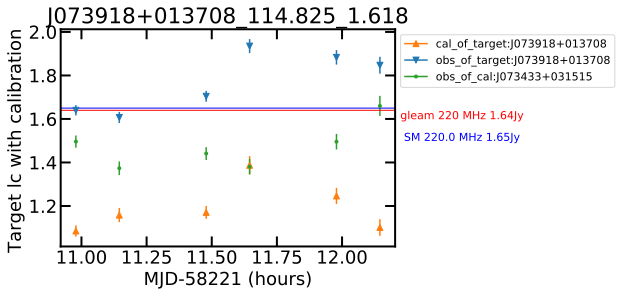

In [96]:
target_index,cal_index=2,3
print('cal',skymodeldata_1000_infield_1Jy[cal_index]['Name'],)
print('target',skymodeldata_1000_infield_1Jy[target_index]['Name'])
plot_calibrate_lightcurve(path_157,target_index,skymodeldata_1000_infield_1Jy,cal_index,skymodeldata_1000_infield_1Jy,calibration_1000_data_220,intmjd0=58221,prefix='src1000_large1',)

## return_ratio_multi_calibrate_obsid

In [167]:
def return_ratio_multi_calibrate_obsid(path,obsid,target_index,skymodeldata,skymodelCAldata,calibration_data,prefix='briggsplus1',gleamlabel=False):
    
    if gleamlabel==True:
        ralabel='RAJ2000'
        declabel='DEJ2000'
        calflux_label='int_flux_220'
        #lc_path_img='%s/lc_ratio_%s_ra_gleam_%s.png'%(path_lc_ratio,obsid,img)
        
    else:
        ralabel='ra'
        declabel='dec'
        calflux_label='flux'
        #lc_path_img='%s/lc_ratio_%s_ra_%s.png'%(path_lc_ratio,obsid,img)
    
    tableflux_label='int_flux'  
    table=read_tables(path,obsid,prefix) 
      
    ra_target=skymodeldata['ra'][target_index]
    dec_target=skymodeldata['dec'][target_index]
    name_target=skymodeldata['Name'][target_index]
    
    table_target=table[abs(table['ra']-ra_target)<0.01]
    table_target=table_target[abs(table_target['dec']-dec_target)<0.01]   
    obs_target_flux=table_target['int_flux'].quantity[0]              
    obs_target_flux_err=table_target['err_int_flux'].quantity[0]
    
    ras=skymodelCAldata[ralabel]
    decs=skymodelCAldata[declabel]
    names=skymodelCAldata['Name']

    flux_ratios=[]
    
    for index,(ra_,dec_,name_) in enumerate(zip(ras,decs,names)):     

        table_source=table[abs(table['ra']-ra_)<0.01]
        table_source=table_source[abs(table_source['dec']-dec_)<0.01]

        if gleamlabel==True:   
            #gleam_calibration=gleamdata[gleamdata['Name']=='GLEAM '+name_]  
            gleam_calibration=gleamdata[gleamdata['Name']==name_]  
            calibration_flux=gleam_calibration[calflux_label]      

        else:    
            calibration_flux=calibration_data[calibration_data['Name']==name_]['flux'][0]      

        if len(table_source)>0:
            table_source_flux=table_source[tableflux_label][0]    
            flux_ratios.append(table_source_flux/calibration_flux)
            
    return flux_ratios,obs_target_flux,obs_target_flux_err

In [168]:
flux_ratios,obs_target_flux,obs_target_flux_err=return_ratio_multi_calibrate_obsid(path_157,obsids_path_157[0],2,skymodeldata_1000_infield_1Jy,skymodeldata_1000_infield_1Jy,calibration_1000_data_220,prefix='src1000_large1',gleamlabel=False)

In [169]:
obsids_path_157[0],np.mean(flux_ratios),np.std(flux_ratios)

('1207652304', 1.3595848103321064, 0.16446885868864294)

In [170]:
obs_target_flux,obs_target_flux_err

(<Quantity 1.639863>, <Quantity 0.02372974>)

## def plot_multi_calibrate_lightcurve

In [174]:
def plot_multi_calibrate_lightcurve(path,target_index,skymodeldata,skymodelCAldata,calibration_data,prefix='briggsplus1',gleamlabel=False):
    obsids=get_obsids(path)
    
    ra_target=skymodeldata['ra'][target_index]
    dec_target=skymodeldata['dec'][target_index]
    name_target=skymodeldata['Name'][target_index]
  
    flux_ratios=[]
    err_flux_ratios=[]
    obsids_ratios=[]
    nums_cal=[]
    obs_target_fluxs=[]
    obs_target_flux_errs=[]
    
    for index,obsid in enumerate(obsids):  
        flux_ratio,obs_target_flux,obs_target_flux_err=return_ratio_multi_calibrate_obsid(path,obsid,target_index,skymodeldata,skymodelCAldata,calibration_data,prefix,gleamlabel)
        flux_ratios.append(np.mean(flux_ratio)) 
        err_flux_ratios.append(np.std(flux_ratio))
        obsids_ratios.append(int(obsid))
        nums_cal.append(len(flux_ratio))
        obs_target_fluxs.append(obs_target_flux)
        obs_target_flux_errs.append(obs_target_flux_err)           
    return np.array(obsids_ratios),np.array(flux_ratios),np.array(err_flux_ratios),np.array(nums_cal),obs_target_fluxs,obs_target_flux_errs
      

In [175]:
target_index=2
obsids_ratios,flux_ratios,err_flux_ratios,nums_cal,obs_target_fluxs,obs_target_flux_errs=plot_multi_calibrate_lightcurve(path_src1000_large3,target_index,skymodeldata_1000_infield_1Jy,skymodeldata_100,calibration_1000_data_220,prefix='src1000_large3',gleamlabel=False)

In [176]:
print(nums_cal)

[89 89 89 90 90 89 90 89 89 89 89 89]


Text(0.5, 0, 'hour')

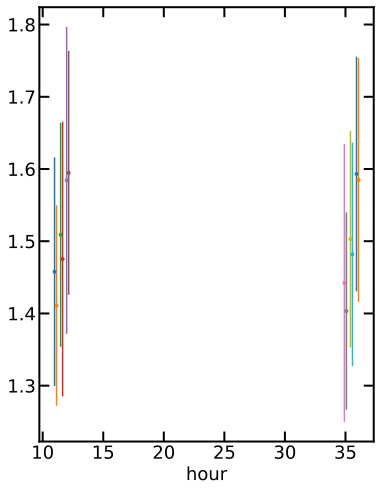

In [173]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)   
set_ax_tick(ax)
intmjd0=58221

for index,obsid in enumerate(obsids_ratios):
    mjd=Time(obsid, format='gps').mjd
    plt.errorbar((mjd-intmjd0)*24,flux_ratios[index],err_flux_ratios[index],fmt='.')
plt.xlabel('hour')
#plt.xlim(10,13)

(10, 13)

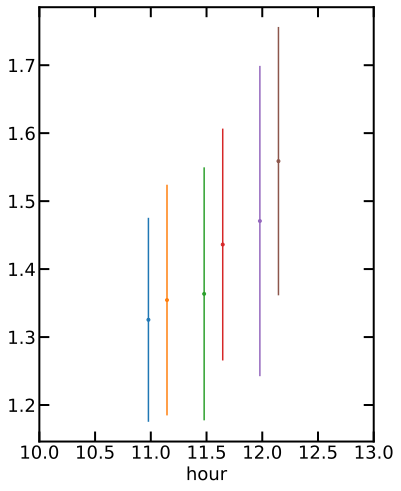

In [132]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)   
set_ax_tick(ax)
intmjd0=58221

for index,obsid in enumerate(obsids_ratios):
    mjd=Time(obsid, format='gps').mjd
    plt.errorbar((mjd-intmjd0)*24,flux_ratios[index],err_flux_ratios[index],fmt='.')

plt.xlabel('hour')
plt.xlim(10,13)

(34.5, 36.5)

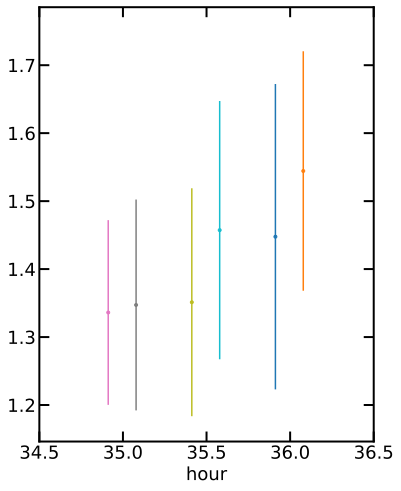

In [135]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)   
set_ax_tick(ax)
intmjd0=58221

for index,obsid in enumerate(obsids_ratios):
    mjd=Time(obsid, format='gps').mjd
    plt.errorbar((mjd-intmjd0)*24,flux_ratios[index],err_flux_ratios[index],fmt='.')

plt.xlabel('hour')
plt.xlim(34.5,36.5)

### calibrate skymodeldata_1000_infield_1Jy

In [177]:
target_index=2
obsids_ratios,flux_ratios,err_flux_ratios,nums_cal,obs_target_fluxs,obs_target_flux_errs=plot_multi_calibrate_lightcurve(path_src1000_large3,target_index,skymodeldata_1000_infield_1Jy,skymodeldata_1000_infield_1Jy,calibration_1000_data_220,prefix='src1000_large3',gleamlabel=False)
print(nums_cal)

[11 11 11 11 11 11 11 11 11 11 11 11]


Text(0.5, 0, 'hour')

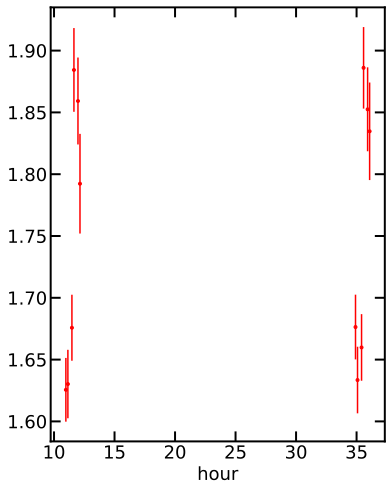

In [180]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)   
set_ax_tick(ax)
intmjd0=58221

for index,obsid in enumerate(obsids_ratios):
    mjd=Time(obsid, format='gps').mjd
    #plt.errorbar((mjd-intmjd0)*24,flux_ratios[index],err_flux_ratios[index],fmt='.')
    plt.errorbar((mjd-intmjd0)*24,obs_target_fluxs[index],obs_target_flux_errs[index],fmt='.',color='r')
    
plt.xlabel('hour')
#plt.xlim(10,13)

### calibrate gleam_select_infield_0dot5Jy

In [185]:
target_index=2
obsids_ratios,flux_ratios,err_flux_ratios,nums_cal,obs_target_fluxs,obs_target_flux_errs=plot_multi_calibrate_lightcurve(path_src1000_large3,target_index,skymodeldata_1000_infield_1Jy,gleam_select_infield_0dot5Jy,gleam_select_infield_0dot5Jy,prefix='src1000_large3',gleamlabel=True)
print(nums_cal)

[11 11 11 11 11 11 11 11 11 11 11 11]


Text(0.5, 0, 'hour')

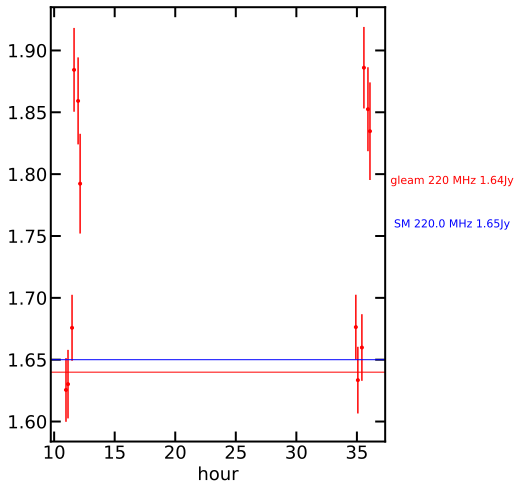

In [188]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)   
set_ax_tick(ax)
intmjd0=58221

target_index=2
skymodeldata=skymodeldata_1000_infield_1Jy
calibration_data=calibration_1000_data_220

ra_target=skymodeldata['ra'][target_index]
dec_target=skymodeldata['dec'][target_index]
name_target=skymodeldata['Name'][target_index]


calibration_freq_target,calibration_flux_target=calibration_data[calibration_data['Name']==name_target]['freq'],calibration_data[calibration_data['Name']==name_target]['flux']            
    
    
for index,obsid in enumerate(obsids_ratios):
    mjd=Time(obsid, format='gps').mjd
    #plt.errorbar((mjd-intmjd0)*24,flux_ratios[index],err_flux_ratios[index],fmt='.')
    plt.errorbar((mjd-intmjd0)*24,obs_target_fluxs[index],obs_target_flux_errs[index],fmt='.',color='r')
  
    
ax.axhline(calibration_flux_target,color='b',ls='-',lw=1)  
ax.text(1.2, 0.5, 'SM %s MHz %sJy'%(calibration_freq_target[0],calibration_flux_target[0]), 
                horizontalalignment = 'center', verticalalignment = 'center', 
                transform = ax.transAxes, fontsize = 11,color='b')

gleam_calibration=gleamdata[gleamdata['Name']=='GLEAM '+name_target]          
ax.axhline(gleam_calibration['int_flux_220'],color='r',ls='-',lw=1)
ax.text(1.2, 0.6, 'gleam 220 MHz %.2fJy'%gleam_calibration['int_flux_220'][0],
                         horizontalalignment = 'center', verticalalignment = 'center', 
                          transform = ax.transAxes, fontsize = 11,color='r')
plt.xlabel('hour') 
#plt.xlim(10,13)

Text(0, 0.5, 'flux (Jy)')

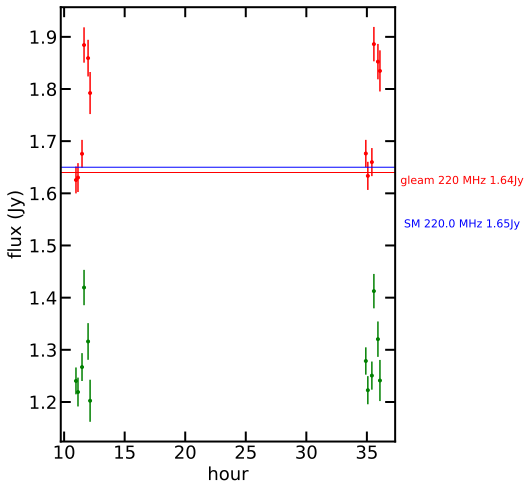

In [268]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)   
set_ax_tick(ax)
intmjd0=58221

target_index=2
skymodeldata=skymodeldata_1000_infield_1Jy
calibration_data=calibration_1000_data_220

ra_target=skymodeldata['ra'][target_index]
dec_target=skymodeldata['dec'][target_index]
name_target=skymodeldata['Name'][target_index]

calibration_freq_target,calibration_flux_target=calibration_data[calibration_data['Name']==name_target]['freq'],calibration_data[calibration_data['Name']==name_target]['flux']            
    
    
for index,obsid in enumerate(obsids_ratios):
    mjd=Time(obsid, format='gps').mjd
    #plt.errorbar((mjd-intmjd0)*24,flux_ratios[index],err_flux_ratios[index],fmt='.')
    plt.errorbar((mjd-intmjd0)*24,obs_target_fluxs[index],
                 obs_target_flux_errs[index],
                 fmt='.',color='r',
                 label='obs_flux'
                )
    plt.errorbar((mjd-intmjd0)*24,obs_target_fluxs[index]/flux_ratios[index],
                 obs_target_flux_errs[index],
                 fmt='.',color='g',
                label='calibrated_flux'
                )
    
    
ax.axhline(calibration_flux_target,color='b',ls='-',lw=1)  
ax.text(1.2, 0.5, 'SM %s MHz %sJy'%(calibration_freq_target[0],calibration_flux_target[0]), 
                horizontalalignment = 'center', verticalalignment = 'center', 
                transform = ax.transAxes, fontsize = 11,color='b')

gleam_calibration=gleamdata[gleamdata['Name']=='GLEAM '+name_target]          
ax.axhline(gleam_calibration['int_flux_220'],color='r',ls='-',lw=1)
ax.text(1.2, 0.6, 'gleam 220 MHz %.2fJy'%gleam_calibration['int_flux_220'][0],
                         horizontalalignment = 'center', verticalalignment = 'center', 
                          transform = ax.transAxes, fontsize = 11,color='r')
plt.xlabel('hour')
plt.ylabel('flux (Jy)')
#plt.xlim(10,13)

# Variability measures

## excess_variance

<span style="font-size:larger;">
$$\sigma_{rms}^2=\frac{1}{N\mu^2}\sum_{i=1}^{N}[(X_i-\mu)^2-\sigma_i^2]\\$$
</span>  



<span style="font-size:larger;">
    error on $\sigma_{rms}^2$
</span>  


<span style="font-size:larger;">
    
$$error_{\sigma_{rms}^2}=s_D/(\mu^2\sqrt{N})$$

</span>  

<span style="font-size:larger;">

$$s_D^2=\frac{1}{N-1}\sum_{i=1}^{N}\{[(X_i-\mu)^2-\sigma_i^2]-\sigma_{rms}^2\mu^2\}^2$$

</span> 

<span style="font-size:larger;">
    
$$  F_\mathrm{var} = \frac{\sqrt{\sigma^2-\sigma_{err}^2}}{<f>}   = \sigma_{rms}$$

$$ \mu= <f>= \frac{\sum_{i=1}^{N} f_i}{N}$$


$$ \sigma^2= \frac{\sum_{i=1}^{N} (f_i-<f>)^2}{N}$$


$$ \sigma_{err}^2=\frac{\sum_{i=1}^{N} \sigma_i^2}{N}$$
 
</span>    

In [207]:
from IPython.display import display, Math ,Markdown

In [232]:
def get_excess_variance(data,flux_label,fluxerr_label):

    mu=np.average(data[flux_label])
    mu_err=np.average(data[fluxerr_label])  
    len_flux=len(data[flux_label])

    sigma_rms_sqr2=np.sum((data[flux_label]-mu)**2-data[fluxerr_label]**2)/len_flux/mu**2
    
    sd_sqr2_err=np.sum(((data[flux_label]-mu)**2-data[fluxerr_label]**2-sigma_rms_sqr2*mu**2)**2)/(len_flux-1)
    sigma2_err=sd_sqr2_err**0.5/(mu**2*len_flux**0.5)
    
    sigma_rms=sigma_rms_sqr2**0.5
    sigma_rms_err=sigma2_err*0.5*sigma_rms_sqr2**-0.5
    
    return mu,mu_err,sigma_rms_sqr2,sigma2_err,sigma_rms,sigma_rms_err
  
mu,mu_err,sigma_rms_sqr2,sigma2_err,sigma_rms,sigma_rms_err=  get_excess_variance(df_157_src1000_large3,'int_flux','err_int_flux')  

In [ ]:
{:.3f}".format()

In [235]:
display(Markdown(rf"""

$\mu : {mu}$

$\mu_{{err}} : {mu_err}$

$\sigma_{{rms}}^2: {sigma_rms_sqr2} \pm {sigma2_err}$

$\sigma_{{rms}}:{sigma_rms} \pm {sigma_rms_err} $

"""              
                ))



$\mu : 1.750852108001709$

$\mu_{err} : 0.03132149577140808$

$\sigma_{rms}^2: 0.0032164288500648093 \pm 0.0005099082639326915$

$\sigma_{rms}:0.056713568482901947 \pm 0.004495469757703741 $



## fractional_variability

In [236]:
def get_fractional_variability(data,flux_label,fluxerr_label):
    mu=np.average(data[flux_label])
    mu_err=np.average(data[fluxerr_label])
    
    len_flux=len(data[flux_label]) 
    
    S_2=np.sum((mu-data[flux_label])**2)/(len_flux-1)
    
    mean_sigma_err_2=np.average(data[fluxerr_label]**2)
    
    F_var=np.sqrt((S_2-mean_sigma_err_2)/mu**2)
    
    return F_var

In [237]:
F_var=get_fractional_variability(df_157_src1000_large3,'int_flux','err_int_flux')

In [238]:
F_var

<Quantity 0.05948686>

## modulation index

<span style="font-size:larger;">
$$m=\frac{\sigma_s}{\bar{S}}$$
</span>     

%\begin{displaymath}
<span style="font-size:larger;">
$$\bar{S}=\frac{\sum_{i=1}^{n}\, (\frac{S_i}{\sigma_i^2})}{\sum_{i=1}^{n}\,(\frac{1}{\sigma_i^2})}$$
</span>    
%\end{displaymath}

## chi-square of lc

<span style="font-size:larger;">
$$\chi_{lc}^2=\sum_{i=1}^{n} \frac{(S_i-\bar{S})^2}{\sigma_i^2}  $$
</span>  


<span style="font-size:larger;">
$$\chi_{red}^2= \frac{\chi_{lc}^2}{n-1}$$
</span>   


<span style="font-size:larger;">
$$(\frac{\chi_{red}^2}{2.91} -1)(\frac{m}{3 per cent})>1$$
</span>   

## def return_modulation_chisq

In [197]:
def return_modulation_chisq(modulation_df):
    
    s_bar=np.sum(modulation_df['int_flux']/modulation_df['err_int_flux']**2)/np.sum(1/modulation_df['err_int_flux']**2)
    sigma_s=np.std(modulation_df['int_flux'])
    m=sigma_s/s_bar
    #print('len',len(modulation_df))
    #print('modulation index',m)
    chisq_lc=np.sum((modulation_df['int_flux']-s_bar)**2/modulation_df['err_int_flux']**2)
    #print('chisq_lc',chisq_lc)

    chisq_red=chisq_lc/(len(modulation_df)-1)
    #print('chisq_red',chisq_red)
    return  m,chisq_lc,chisq_red
    

In [198]:
def def_modulation_sources(path,selectdata,prefix='src1000_large1',gleamlabel=False):
    if gleamlabel==True:
        ralabel='RAJ2000'
        declabel='DEJ2000'
        
    else:
        ralabel='ra'
        declabel='dec'

    ras=selectdata[ralabel]
    decs=selectdata[declabel]
    names=selectdata['Name']

    for index,(ra_,dec_,name_) in enumerate(zip(ras,decs,names)):    
        
        no_table_obsids,no_select_obsids, with_noise_obsids,df_= \
                return_table_of_onesource(path,ra_,dec_,prefix)
        
        if len(df_)>1:
            m,chisq_lc,chisq_red=return_modulation_chisq(df_)
            print(index,name_,m,chisq_lc,chisq_red)
        

In [195]:
no_table_obsids_157_src1000_large3,no_select_obsids_157_src1000_large3, with_noise_obsids_157_src1000_large3,df_157_src1000_large3=return_table_of_onesource(path_src1000_large3,ra=114.825,dec=1.618,prefix='src1000_large3')

In [196]:
df_157_src1000_large3

obsid           mjd freq            int_flux          err_int_flux  \
0   1207652304  58221.457442  215  1.6255640983581543   0.02576206997036934   
1   1207652904  58221.464387  215  1.6302268505096436   0.02769155241549015   
2   1207654104  58221.478275  215  1.6757792234420776   0.02667837031185627   
3   1207654704  58221.485220  215  1.8843183517456055  0.033864498138427734   
4   1207655904  58221.499109  215  1.8591930866241455  0.035152845084667206   
5   1207656504  58221.506053  215  1.7922937870025635  0.040329642593860626   
6   1207738464  58222.454664  215  1.6763399839401245   0.02617444284260273   
7   1207739064  58222.461609  215  1.6334664821624756  0.026935702189803123   
8   1207740264  58222.475498  215  1.6598337888717651   0.02692534402012825   
9   1207740864  58222.482442  215  1.8860362768173218   0.03296244144439697   
10  1207742064  58222.496331  215  1.8524733781814575   0.03394346684217453   
11  1207742664  58222.503275  215  1.8346998691558838  0.039437584578990936   

             peak_flux         err_peak_flux    dec       ra  
0   1.7353618144989014  0.024182593449950218  1.618  114.825  
1    1.686225175857544   0.02519318088889122  1.618  114.825  
2    1.838336706161499   0.02588917315006256  1.618  114.825  
3   1.8665529489517212  0.029630271717905998  1.618  114.825  
4   1.9596145153045654   0.03295387327671051  1.618  114.825  
5   1.9095460176467896    0.0383358933031559  1.618  114.825  
6   1.7938783168792725  0.024655809625983238  1.618  114.825  
7   1.6892098188400269  0.024500185623764992  1.618  114.825  
8   1.8230050802230835  0.026157770305871964  1.618  114.825  
9   1.8736788034439087  0.028927966952323914  1.618  114.825  
10  1.9692515134811401   0.03210248798131943  1.618  114.825  
11  1.9506913423538208   0.03739817440509796  1.618  114.825

In [199]:
def_modulation_sources(path_src1000_large3,skymodeldata_1000_infield_1Jy,prefix='src1000_large3',gleamlabel=False)

1 J073354+020223 0.06019132766208848 2272.6128388368143 206.60116716698312
2 J073918+013708 0.06046112949237344 136.06528587644715 12.369571443313378
3 J073433+031515 0.08152367308750808 97.81009773141824 8.891827066492567
4 J074049+014257 0.07475783121152128 69.4033323971343 6.309393854284937
5 J074244+010602 0.04406941073408985 12.57739468951122 1.1433995172282927
6 J074406+030157 0.10126113451734192 54.43678831378335 4.948798937616669
7 J074200+005211 0.09120247347935127 38.27613729075428 3.4796488446140255
8 J073826+020438 0.06480682005502825 20.53273353900854 1.8666121399098672
9 J074458+032253 0.0550249911331111 22.25631450621681 2.0233013187469826
10 J073757+013705 0.15838624340184074 57.63505858985483 5.239550780895893
11 J073353+035936 0.1949942667616763 80.1548701826187 7.286806380238063
